# 4 - PCA - ANALISIS DE COMPONENTES PRINCIPALES

**AUTOR: Fabrizio Ramirez Cutimbo**

**OBJETIVOS:**

+ Aplicar técnicas de preprocesamiento: Estandarización
+ Identificar variables representativas utilizando técnicas como PCA
+ Visualización de variables representativas en gráficos de dispersión. 
--- 

### Importar Librerias

In [34]:
import pandas as pd
import numpy as np
#Graficos
import matplotlib.pyplot as plt
import seaborn as sns
#Scikit Learn PREPROCESING
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

### Carga de datasets

In [35]:
pd_companias = pd.read_csv('Datasets Procesados/directorio_empresas_final.csv', dtype={'RUC': 'object'})

+ Se valida que no hay Missing Values

In [36]:
pd_companias.isna().sum()

EXPEDIENTE               0
RUC                      0
SITUACION_LEGAL          0
FECHA_CONSTITUCION       0
TIPO                     0
                        ..
IF_MARGEN_BRUTO          0
IF_MARGEN_OPERACIONAL    0
IF_MARGEN_NETO           0
IF_ROE                   0
IF_ROA                   0
Length: 71, dtype: int64

In [37]:
pd_companias.sample(2)

EXPEDIENTE            RUC SITUACION_LEGAL FECHA_CONSTITUCION  \
30625      718874  1792890551001          ACTIVA         04/07/2018   
7726       131525  0992574054001          ACTIVA         04/06/2008   

                           TIPO     PAIS  REGION  PROVINCIA CANTON CIUDAD  \
30625  RESPONSABILIDAD LIMITADA  ECUADOR  SIERRA  PICHINCHA  QUITO  QUITO   
7726                    ANÓNIMA  ECUADOR   COSTA     GUAYAS  DAULE  DAULE   

       ... SEGMENTO IF_PRUEBA_ACIDA IF_ENDEUDAMIENTO_ACTIVO IF_APALANCAMIENTO  \
30625  ...    MICRO          23.522                   0.950            19.998   
7726   ...  PEQUENA           0.612                   0.376             1.602   

      IF_ROTACION_VENTAS IF_MARGEN_BRUTO IF_MARGEN_OPERACIONAL IF_MARGEN_NETO  \
30625              0.133            1.00                 0.074            0.0   
7726               0.858            0.96                 0.316            0.0   

       IF_ROE  IF_ROA  
30625     0.0     0.0  
7726      0.0     0.0  

[2 rows x 71 columns]

In [38]:
pd_companias.shape

(37884, 71)

+ Conteo de Compañías por Actividad Económica Y Región

In [39]:
pd_companias[['CIIU_NIVEL_1', 'CIIU_NIVEL_1_DESC']].value_counts().sum

<bound method Series.sum of CIIU_NIVEL_1  CIIU_NIVEL_1_DESC                                  
M             ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS      12010
N             ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO     6311
C             INDUSTRIAS MANUFACTURERAS                               6271
A             AGRICULTURA, GANADERÍA,  SILVICULTURA Y PESCA           4794
J             INFORMACIÓN Y COMUNICACIÓN                              4233
I             ACTIVIDADES DE ALOJAMIENTO Y DE SERVICIO DE COMIDAS     2267
K             ACTIVIDADES FINANCIERAS Y DE SEGUROS                    1998
Name: count, dtype: int64>

In [40]:
pd_companias[['REGION']].value_counts().sum

<bound method Series.sum of REGION   
SIERRA       19443
COSTA        17497
ORIENTE        626
GALÁPAGOS      318
Name: count, dtype: int64>

### PREPROCESAMIENTO

#### Encoding de columnas categóricas
ONE HOT ENCODINGS para la variables categóricas nominales CIIU_NIVEL_1 y REGION

In [41]:
# COLUMNA CIIU_NIVEL_1
# Definición del OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  

# Aplicar Encoding a CIIU 1
encoded = encoder.fit_transform(pd_companias[['CIIU_NIVEL_1']])
# Convertir a DataFrame para facilitar la unión
pd_encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['CIIU_NIVEL_1']))
# Combinar con el DataFrame original
pd_companias = pd.concat([pd_companias, pd_encoded_df], axis=1)


# Aplicar Encoding a REGION
encoded = encoder.fit_transform(pd_companias[['REGION']])
# Convertir a DataFrame para facilitar la unión
pd_encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['REGION']))
# Combinar con el DataFrame original
pd_companias = pd.concat([pd_companias, pd_encoded_df], axis=1)


LABEL ENCODINGS para la variables categóricas Ordinales como SEGMENTO

In [42]:
# Crear un diccionario de Encoding
orden_segmento = {
    'MICRO': 1,
    'PEQUENA': 2,
    'MEDIANA': 3,
    'GRANDE': 4
}

# LAbel Encoding manual para columna SEGMENTO (Categórica Ordinal)
pd_companias['SEGMENTO_ENCODED'] = pd_companias['SEGMENTO'].map(orden_segmento)

#Visualziar encoding
pd_companias.sample(2)


EXPEDIENTE            RUC SITUACION_LEGAL FECHA_CONSTITUCION  \
12023      168794  0992812222001          ACTIVA         26/02/2013   
24303      341782  1691729057001          ACTIVA         28/11/2022   

                                     TIPO     PAIS   REGION PROVINCIA  \
12023            RESPONSABILIDAD LIMITADA  ECUADOR    COSTA    GUAYAS   
24303  SOCIEDAD POR ACCIONES SIMPLIFICADA  ECUADOR  ORIENTE   PASTAZA   

          CANTON     CIUDAD  ... CIIU_NIVEL_1_I CIIU_NIVEL_1_J CIIU_NIVEL_1_K  \
12023  GUAYAQUIL  GUAYAQUIL  ...            0.0            0.0            0.0   
24303    PASTAZA       PUYO  ...            0.0            0.0            0.0   

      CIIU_NIVEL_1_M CIIU_NIVEL_1_N REGION_COSTA REGION_GALÁPAGOS  \
12023            1.0            0.0          1.0              0.0   
24303            1.0            0.0          0.0              0.0   

      REGION_ORIENTE  REGION_SIERRA  SEGMENTO_ENCODED  
12023            0.0            0.0                 2  
24303            1.0            0.0                 1  

[2 rows x 83 columns]

In [43]:
pd_companias.columns

Index(['EXPEDIENTE', 'RUC', 'SITUACION_LEGAL', 'FECHA_CONSTITUCION', 'TIPO',
       'PAIS', 'REGION', 'PROVINCIA', 'CANTON', 'CIUDAD', 'CIIU_NIVEL_1',
       'CIIU_NIVEL_1_DESC', 'CIIU_NIVEL_3', 'CIIU_NIVEL_3_DESC',
       'CIIU_NIVEL_4', 'CIIU_NIVEL_4_DESC', 'CIIU_NIVEL_6',
       'CIIU_NIVEL_6_DESC', 'ACTIVO_2022', 'ACTIVO_CORRIENTE_2022',
       'INVENTARIOS_2022', 'ACTIVOS_NO_CORRIENTES_2022', 'PASIVO_2022',
       'PASIVO_CORRIENTE_2022', 'PASIVO_NO_CORRIENTE_2022',
       'PATRIMONIO_NETO_2022', 'INGRESOS_ACTIVIDADES_ORDINARIAS_2022',
       'GANANCIA_BRUTA_2022', 'OTROS_INGRESOS_2022',
       'COSTO_VENTAS_PRODUCCION_2022', 'GASTOS_2022',
       'UTILIDAD_OPERATIVA_2022', 'GANACIA_PERDIDA_ANTES_IR_2022',
       'IMPUESTO_RENTA_2022', 'UTILIDAD_NETA_2022', 'ACTIVO_2023',
       'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023',
       'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023',
       'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
       'INGRESOS_ACTIVID

### CORRELACIÓN 

- Funciones para graficar Matriz de Correlación entre variables numéricas.
- **Si existe correlación lineal, entonces es posible que PCA puede detectar caracteristicas lineales**
- Se observa Alta correlación directa entre las cuentas del año 2023 (y 2022 aunque no se grafica)
- Se observa una ligera Correlación inversa entre los indicadores financieros

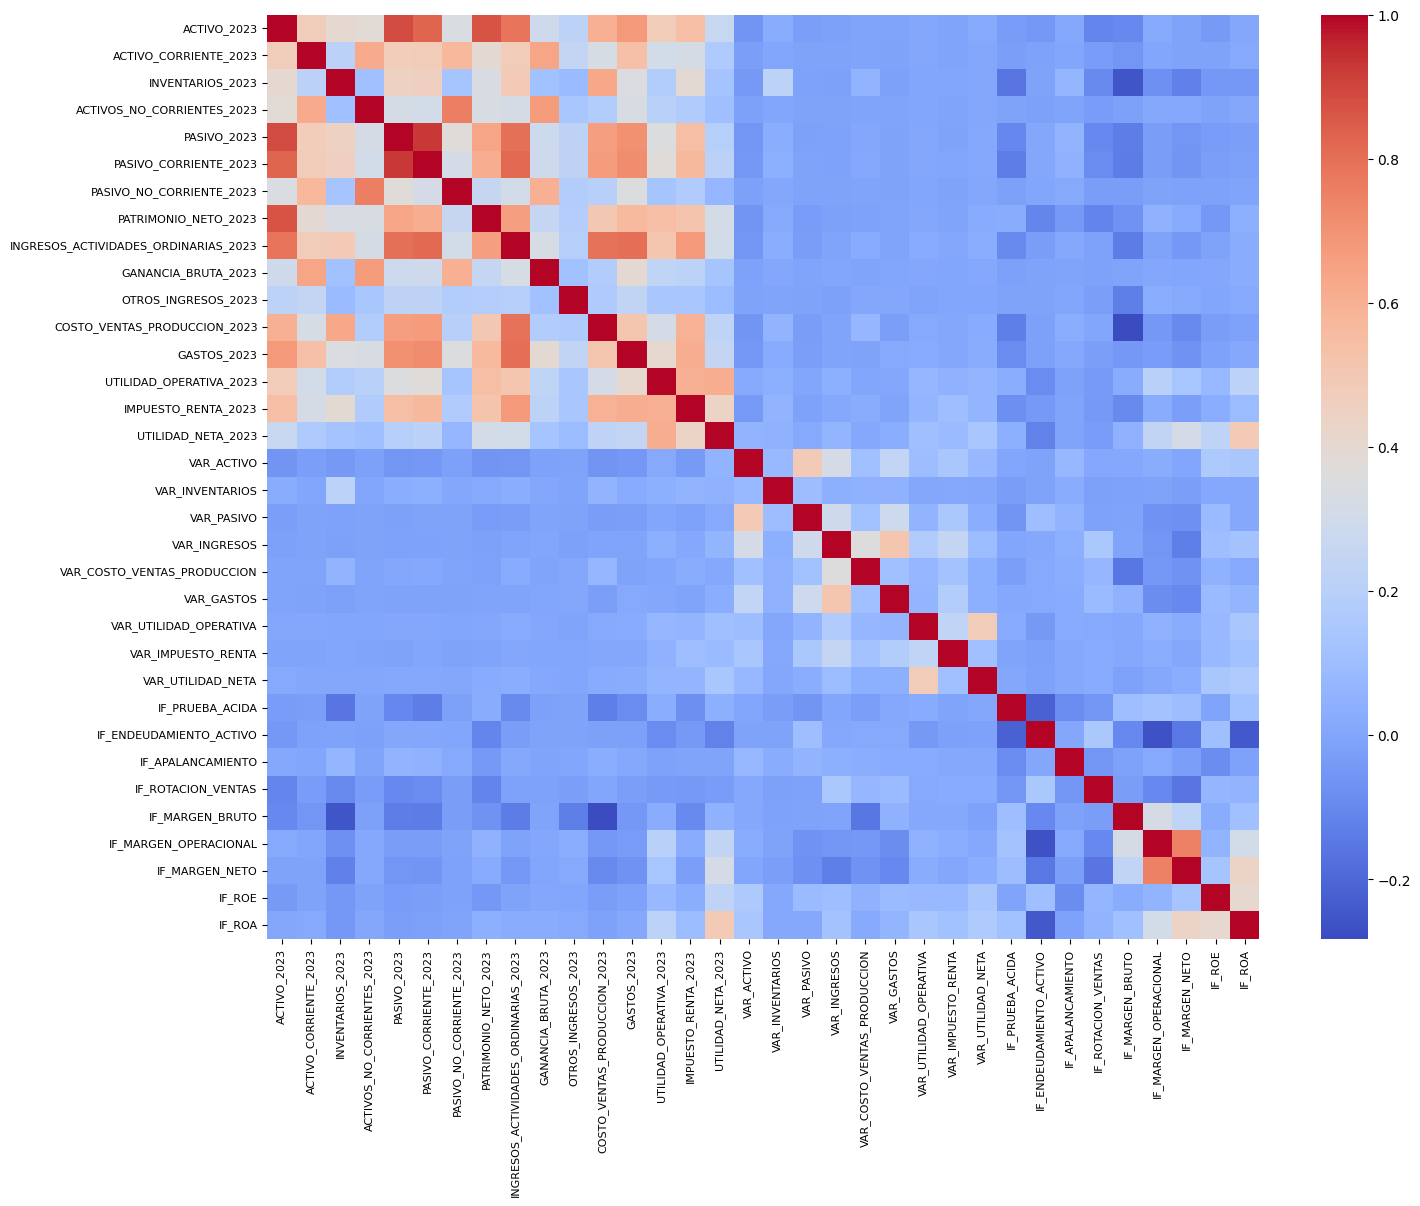

In [44]:
def graficar_matriz_correlacion(dimension_figura, dataset, anotaciones, tamanio_etiquetas):
    matriz_correlacion = dataset.corr()
    plt.figure(figsize=dimension_figura)
    sns.heatmap(matriz_correlacion, cmap='coolwarm', annot=anotaciones, fmt='.2f') 
    # Parámetro "annot" presenta los números dentro de cada cuadrado
    plt.xticks(fontsize=tamanio_etiquetas)  # Ajusta el tamaño de las etiquetas en el eje X
    plt.yticks(fontsize=tamanio_etiquetas)  # Ajusta el tamaño de las etiquetas en el eje Y
    plt.show()

var_to_correlate = ['ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 
                    'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                    'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                    'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023', 'UTILIDAD_NETA_2023',                                    
                    'VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 
                    'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA',
                    'IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA',                    
                    ]
    
graficar_matriz_correlacion((16, 12), pd_companias[var_to_correlate], False, 8)

### NORMALIZACIÓN

Se aplica normalización a variables numéricas con NORM L1 y L2

In [45]:
# Variables a Normalizar
var_to_normalize = ['ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                   'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                   'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023', 'UTILIDAD_NETA_2023',
                   'ACTIVO_2022', 'ACTIVO_CORRIENTE_2022', 'INVENTARIOS_2022', 'ACTIVOS_NO_CORRIENTES_2022', 'PASIVO_2022', 'PASIVO_CORRIENTE_2022', 'PASIVO_NO_CORRIENTE_2022', 'PATRIMONIO_NETO_2022', 
                   'INGRESOS_ACTIVIDADES_ORDINARIAS_2022', 'GANANCIA_BRUTA_2022', 'OTROS_INGRESOS_2022', 'COSTO_VENTAS_PRODUCCION_2022', 'GASTOS_2022', 
                   'UTILIDAD_OPERATIVA_2022', 'IMPUESTO_RENTA_2022', 'UTILIDAD_NETA_2022',                   
                   'VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA',
                   'IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA',
                   #    No se recomienda normalizar variables categóricas
                   #    'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N', 
                   #    'REGION_COSTA', 'REGION_GALÁPAGOS', 'REGION_ORIENTE', 'REGION_SIERRA', 'SEGMENTO_ENCODED'
                   ]

In [46]:
### NOTA: Se realizaron experimentos en los que se ratifica que la normalización no genera clusters adecuados.
# Crear el objeto Normalizer L1
normalizer = Normalizer(norm='l1')
# Aplicar la normalización
pd_dataset_normalized = normalizer.fit_transform(pd_companias[var_to_normalize])
# Convertir a DataFrame 
normalized_df = pd.DataFrame(pd_dataset_normalized, columns=var_to_normalize)
# Actualizar en las columnas originales
pd_companias_normalized_l1 = pd_companias.copy() # Se agrega para crear un dataset completamente distinto
pd_companias_normalized_l1[var_to_normalize] = normalized_df

# Crear el objeto Normalizer L2
normalizer = Normalizer(norm='l2')
# Aplicar la normalización
pd_dataset_normalized = normalizer.fit_transform(pd_companias[var_to_normalize])
# Convertir a DataFrame 
normalized_df = pd.DataFrame(pd_dataset_normalized, columns=var_to_normalize)
# Actualizar en las columnas originales
pd_companias_normalized_l2 = pd_companias.copy() # Se agrega para crear un dataset completamente distinto
pd_companias_normalized_l2[var_to_normalize] = normalized_df


### ESTANDARIZACIÓN

Se utiliza la función StandardScaler:

z = ( x - μ ) / σ

Con el objetido de:

- Que el promedio sea "0", y la desviación estandar "1"
- Se recomienda utilizar Estandarización como proceso de normalización para la aplciación de la técnica PCA


In [47]:
# Crear el objeto StandardScaler
scaler = StandardScaler()

# Aplicar la estandarización
pd_dataset_scaled = scaler.fit_transform(pd_companias[var_to_normalize])

# Convertir a DataFrame 
scaled_df = pd.DataFrame(pd_dataset_scaled, columns=var_to_normalize)

# Actualizar en las columnas originales
pd_companias_standardized = pd_companias.copy()  # Crear un dataset completamente distinto
pd_companias_standardized[var_to_normalize] = scaled_df

In [48]:
description = pd_companias_standardized[var_to_normalize].describe()
# Aplicar formato a los valores en el DataFrame de descripción
formatted_description = description.applymap(lambda x: f"{x:.2f}")
formatted_description.head(2)

C:\Users\fabrizio\AppData\Local\Temp\ipykernel_19232\2655327194.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_description = description.applymap(lambda x: f"{x:.2f}")


ACTIVO_2023 ACTIVO_CORRIENTE_2023 INVENTARIOS_2023  \
count    37884.00              37884.00         37884.00   
mean        -0.00                  0.00             0.00   

      ACTIVOS_NO_CORRIENTES_2023 PASIVO_2023 PASIVO_CORRIENTE_2023  \
count                   37884.00    37884.00              37884.00   
mean                        0.00       -0.00                  0.00   

      PASIVO_NO_CORRIENTE_2023 PATRIMONIO_NETO_2023  \
count                 37884.00             37884.00   
mean                     -0.00                 0.00   

      INGRESOS_ACTIVIDADES_ORDINARIAS_2023 GANANCIA_BRUTA_2023  ...  \
count                             37884.00            37884.00  ...   
mean                                 -0.00               -0.00  ...   

      VAR_UTILIDAD_NETA IF_PRUEBA_ACIDA IF_ENDEUDAMIENTO_ACTIVO  \
count          37884.00        37884.00                37884.00   
mean              -0.00            0.00                    0.00   

      IF_APALANCAMIENTO IF_ROTACION_VENTAS IF_MARGEN_BRUTO  \
count          37884.00           37884.00        37884.00   
mean              -0.00               0.00           -0.00   

      IF_MARGEN_OPERACIONAL IF_MARGEN_NETO    IF_ROE    IF_ROA  
count              37884.00       37884.00  37884.00  37884.00  
mean                  -0.00          -0.00      0.00     -0.00  

[2 rows x 50 columns]

---

### Varianza Explicada

ES un concepto de análisis de datos y estadística, usados especialmente en PCA, para represntar la variabidad total de un conjunto de datos capturadoo explicada por un componente en particular.


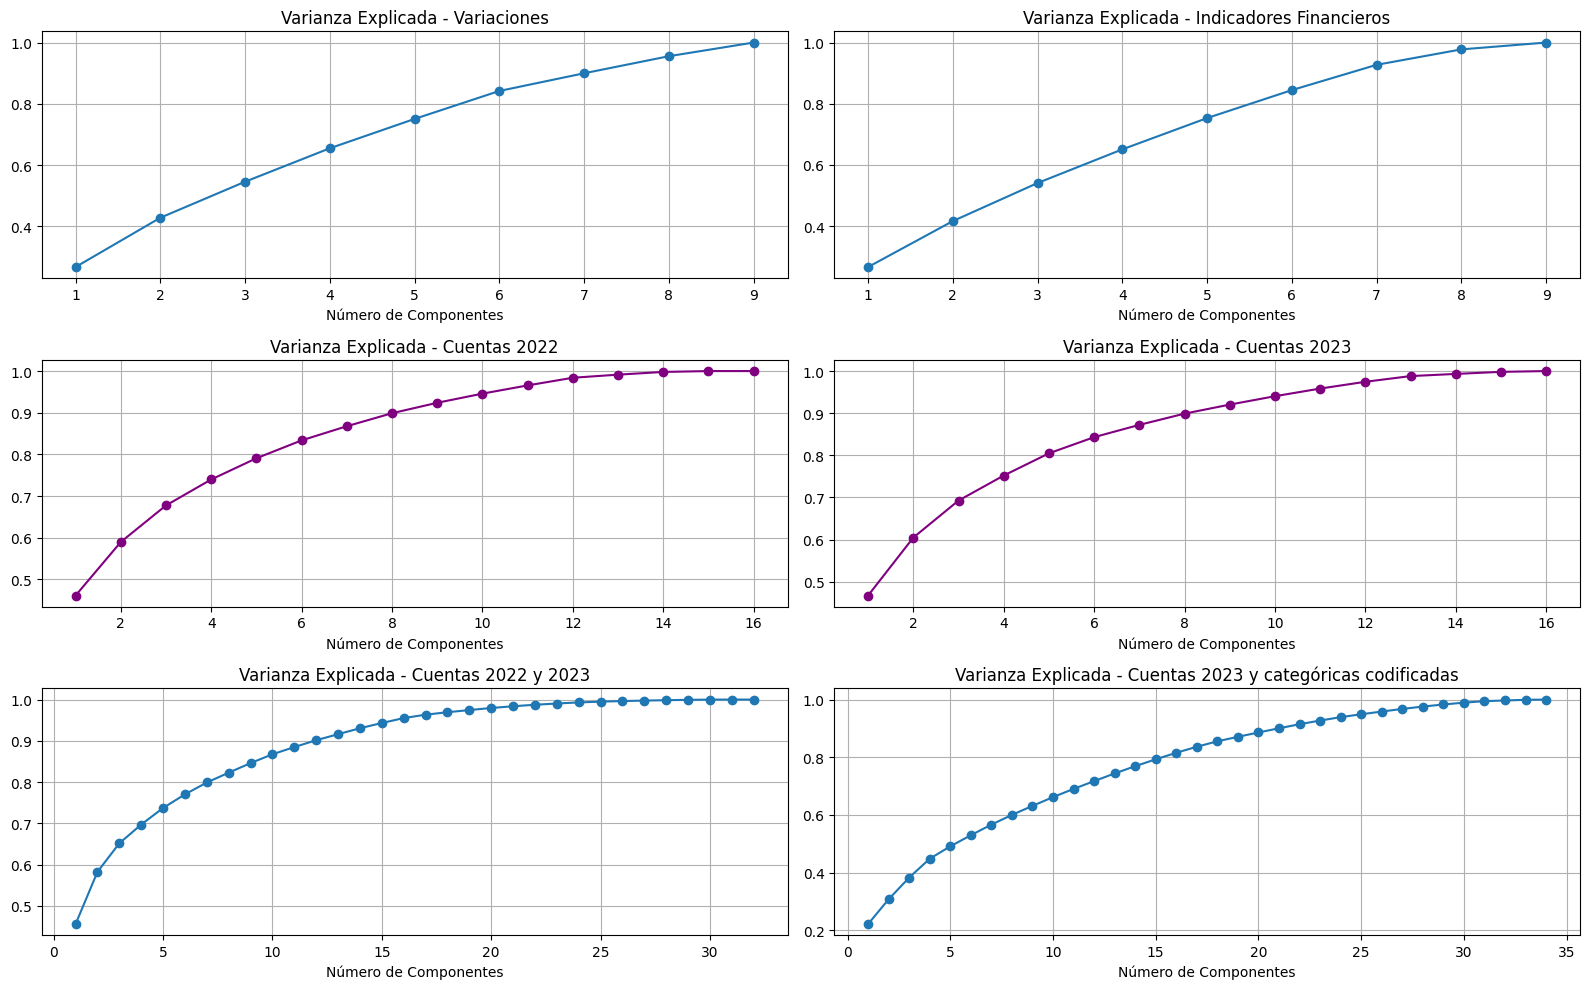

In [49]:
var_set1_to_pca = ['VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA']

var_set2_to_pca = ['IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA']

var_set3_to_pca = ['ACTIVO_2022', 'ACTIVO_CORRIENTE_2022', 'INVENTARIOS_2022', 'ACTIVOS_NO_CORRIENTES_2022', 'PASIVO_2022', 'PASIVO_CORRIENTE_2022', 'PASIVO_NO_CORRIENTE_2022', 'PATRIMONIO_NETO_2022',
                    'INGRESOS_ACTIVIDADES_ORDINARIAS_2022', 'GANANCIA_BRUTA_2022', 'OTROS_INGRESOS_2022', 'COSTO_VENTAS_PRODUCCION_2022', 'GASTOS_2022', 'UTILIDAD_OPERATIVA_2022', 'IMPUESTO_RENTA_2022', 'UTILIDAD_NETA_2022']

var_set4_to_pca = ['ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                    'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023', 'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023', 'UTILIDAD_NETA_2023']

var_set5_to_pca = ['ACTIVO_2022', 'ACTIVO_CORRIENTE_2022', 'INVENTARIOS_2022', 'ACTIVOS_NO_CORRIENTES_2022', 'PASIVO_2022', 'PASIVO_CORRIENTE_2022', 'PASIVO_NO_CORRIENTE_2022', 'PATRIMONIO_NETO_2022',
                    'INGRESOS_ACTIVIDADES_ORDINARIAS_2022', 'GANANCIA_BRUTA_2022', 'OTROS_INGRESOS_2022', 'COSTO_VENTAS_PRODUCCION_2022', 'GASTOS_2022', 'UTILIDAD_OPERATIVA_2022', 'IMPUESTO_RENTA_2022', 'UTILIDAD_NETA_2022',
                    'ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                    'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023', 'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023', 'UTILIDAD_NETA_2023',                    
                    ]

var_set6_to_pca = ['ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                    'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023', 'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023', 'UTILIDAD_NETA_2023',
                    'VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA',
                    'IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA'
                    ]


# Crear la figura y los subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 10))  # 3 filas y 2 columnas

# PCA para var_set1_to_pca
pca_1 = PCA()
pca_1.fit(pd_companias_standardized[var_set1_to_pca])
varianza_acumulada_1 = pca_1.explained_variance_ratio_.cumsum()
axes[0, 0].plot(range(1, len(varianza_acumulada_1) + 1), varianza_acumulada_1, marker='o')
axes[0, 0].set_title('Varianza Explicada - Variaciones')
axes[0, 0].set_xlabel('Número de Componentes')
# axes[0, 0].set_ylabel('Varianza Explicada Acumulada')
axes[0, 0].grid()

# PCA para var_set2_to_pca
pca_2 = PCA()
pca_2.fit(pd_companias_standardized[var_set2_to_pca])
varianza_acumulada_2 = pca_2.explained_variance_ratio_.cumsum()
axes[0, 1].plot(range(1, len(varianza_acumulada_2) + 1), varianza_acumulada_2, marker='o')
axes[0, 1].set_title('Varianza Explicada - Indicadores Financieros')
axes[0, 1].set_xlabel('Número de Componentes')
# axes[0, 1].set_ylabel('Varianza Explicada Acumulada')
axes[0, 1].grid()

# PCA para var_set3_to_pca
pca_3 = PCA()
pca_3.fit(pd_companias_standardized[var_set3_to_pca])
varianza_acumulada_3 = pca_3.explained_variance_ratio_.cumsum()
axes[1, 0].plot(range(1, len(varianza_acumulada_3) + 1), varianza_acumulada_3, marker='o', color='purple')
axes[1, 0].set_title('Varianza Explicada - Cuentas 2022')
axes[1, 0].set_xlabel('Número de Componentes')
# axes[1, 0].set_ylabel('Varianza Explicada Acumulada')
axes[1, 0].grid()

# PCA para var_set4_to_pca
pca_4 = PCA()
pca_4.fit(pd_companias_standardized[var_set4_to_pca])
varianza_acumulada_4 = pca_4.explained_variance_ratio_.cumsum()
axes[1, 1].plot(range(1, len(varianza_acumulada_4) + 1), varianza_acumulada_4, marker='o', color='purple')
axes[1, 1].set_title('Varianza Explicada - Cuentas 2023')
axes[1, 1].set_xlabel('Número de Componentes')
# axes[1, 1].set_ylabel('Varianza Explicada Acumulada')
axes[1, 1].grid()

# PCA para var_set5_to_pca
pca_5 = PCA()
pca_5.fit(pd_companias_standardized[var_set5_to_pca])
varianza_acumulada_5 = pca_5.explained_variance_ratio_.cumsum()
axes[2, 0].plot(range(1, len(varianza_acumulada_5) + 1), varianza_acumulada_5, marker='o')
axes[2, 0].set_title('Varianza Explicada - Cuentas 2022 y 2023')
axes[2, 0].set_xlabel('Número de Componentes')
# axes[2, 0].set_ylabel('Varianza Explicada Acumulada')
axes[2, 0].grid()


# PCA para var_set6_to_pca
pca_6 = PCA()
pca_6.fit(pd_companias_standardized[var_set6_to_pca])
varianza_acumulada_6 = pca_6.explained_variance_ratio_.cumsum()
axes[2, 1].plot(range(1, len(varianza_acumulada_6) + 1), varianza_acumulada_6, marker='o')
axes[2, 1].set_title('Varianza Explicada - Cuentas 2023 y categóricas codificadas')
axes[2, 1].set_xlabel('Número de Componentes')
# axes[2, 1].set_ylabel('Varianza Explicada Acumulada')
axes[2, 1].grid()

# Ajustar diseño
plt.tight_layout()
plt.show()


- El dataset 4 donde solo se utilizan las cuentas contables del año 2023, es el que mayor varianza explicada tiene con dos componentes principales, llegando casi hasta 0.65. El siguiente en la lista es el datset 3 correspondiente a cuentas 2022.
- El dataset 5 donde se utilizan juntas las cuentas contables del año 2022 y 2023 tiene una varianza de 0.62. 
- Si se agregan variables categóricas no se detectan mejoras (Experimentos previos)
- Las variaciones e IF con dos PCAs no llegan siquiera a 0.5
- Combinar Cuentas, variaciones e IF tampoco generan buenos resultados

---

### Funciones para generar 2 PCAs y más

In [50]:
def generar_2_pca_auto(dataset, columnas, nombre_pca1, nombre_pca2):

    #Resetear indice del dataset (evitar problemas al utilziar el mismo dataset varias veces)
    dataset = dataset.reset_index(drop=True)
    # Definir Método PCA - Se requieren solo 2 componente para K-means
    pca_transformer = PCA(n_components=2)      
    # Aplicar PCA a las columnas seleccionados
    principal_components = pca_transformer.fit_transform(dataset[columnas])
    # Crear un DataFrame con los resultados del PCA
    dataframe_pca = pd.DataFrame(data=principal_components, columns=[nombre_pca1, nombre_pca2])
    # Combinar con el dataset original
    dataset_with_pca = dataset.copy() # Se crea un nuevo dataset, en vez de solo referencias
    dataset_with_pca = pd.concat([dataset_with_pca, dataframe_pca], axis=1)

    return dataset_with_pca

def generar_2_pca_arpack(dataset, columnas, nombre_pca1, nombre_pca2):

    # Definir Método PCA - Se requieren solo 2 componente para K-means
    pca_transformer = PCA(n_components=2, svd_solver='arpack')
    # Aplicar PCA a las columnas seleccionados
    principal_components = pca_transformer.fit_transform(dataset[columnas])
    # Crear un DataFrame con los resultados del PCA
    dataframe_pca = pd.DataFrame(data=principal_components, columns=[nombre_pca1, nombre_pca2])
    # Combinar con el dataset original 
    dataset_with_pca = dataset.copy() # Se crea un nuevo dataset, en vez de solo referencias
    dataset_with_pca = pd.concat([dataset_with_pca, dataframe_pca], axis=1)
    return dataset_with_pca

def generar_2_kernel_pca(dataset, columnas, nombre_pca1, nombre_pca2, kernel, gamma):

    # RBF (Radial Basis Function) 
    # Definir Método KernelPCA - Se requieren solo 2 componente para K-means
    kpca_transformer = KernelPCA(n_components=2, kernel=kernel, gamma=gamma)    
    # Aplicar KernelPCA a las columnas seleccionadas
    principal_components = kpca_transformer.fit_transform(dataset[columnas])
    # Crear un DataFrame con los resultados del KernelPCA
    dataframe_pca = pd.DataFrame(data=principal_components, columns=[nombre_pca1, nombre_pca2])
    # Combinar con el dataset original
    dataset_with_pca = dataset.copy() # Se crea un nuevo dataset, en vez de solo referencias
    dataset_with_pca = pd.concat([dataset_with_pca, dataframe_pca], axis=1)
    return dataset_with_pca

def eliminar_outliers_tecnica_iqr(dataset, columns, iqr_multiplier=1.5, lower_quantile=0.25, upper_quantile=0.75):

    cleaned_df = dataset.copy()  # Crear una copia del DataFrame original
    for col in columns:
        # Calcular Q1, Q3 e IQR
        Q1 = cleaned_df[col].quantile(lower_quantile) # Por defecto 25%
        Q3 = cleaned_df[col].quantile(upper_quantile) # Por defecto 75%
        IQR = Q3 - Q1

        # Definir límites inferior y superior
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR

        # Reemplazar valores menores que el límite inferior
        cleaned_df.loc[cleaned_df[col] < lower_bound, col] = lower_bound

        # Reemplazar valores mayores que el límite superior
        cleaned_df.loc[cleaned_df[col] > upper_bound, col] = upper_bound

    return cleaned_df

### Experimento 1 - PCA - Variaciones de Cuentas e Indicadores Financieros

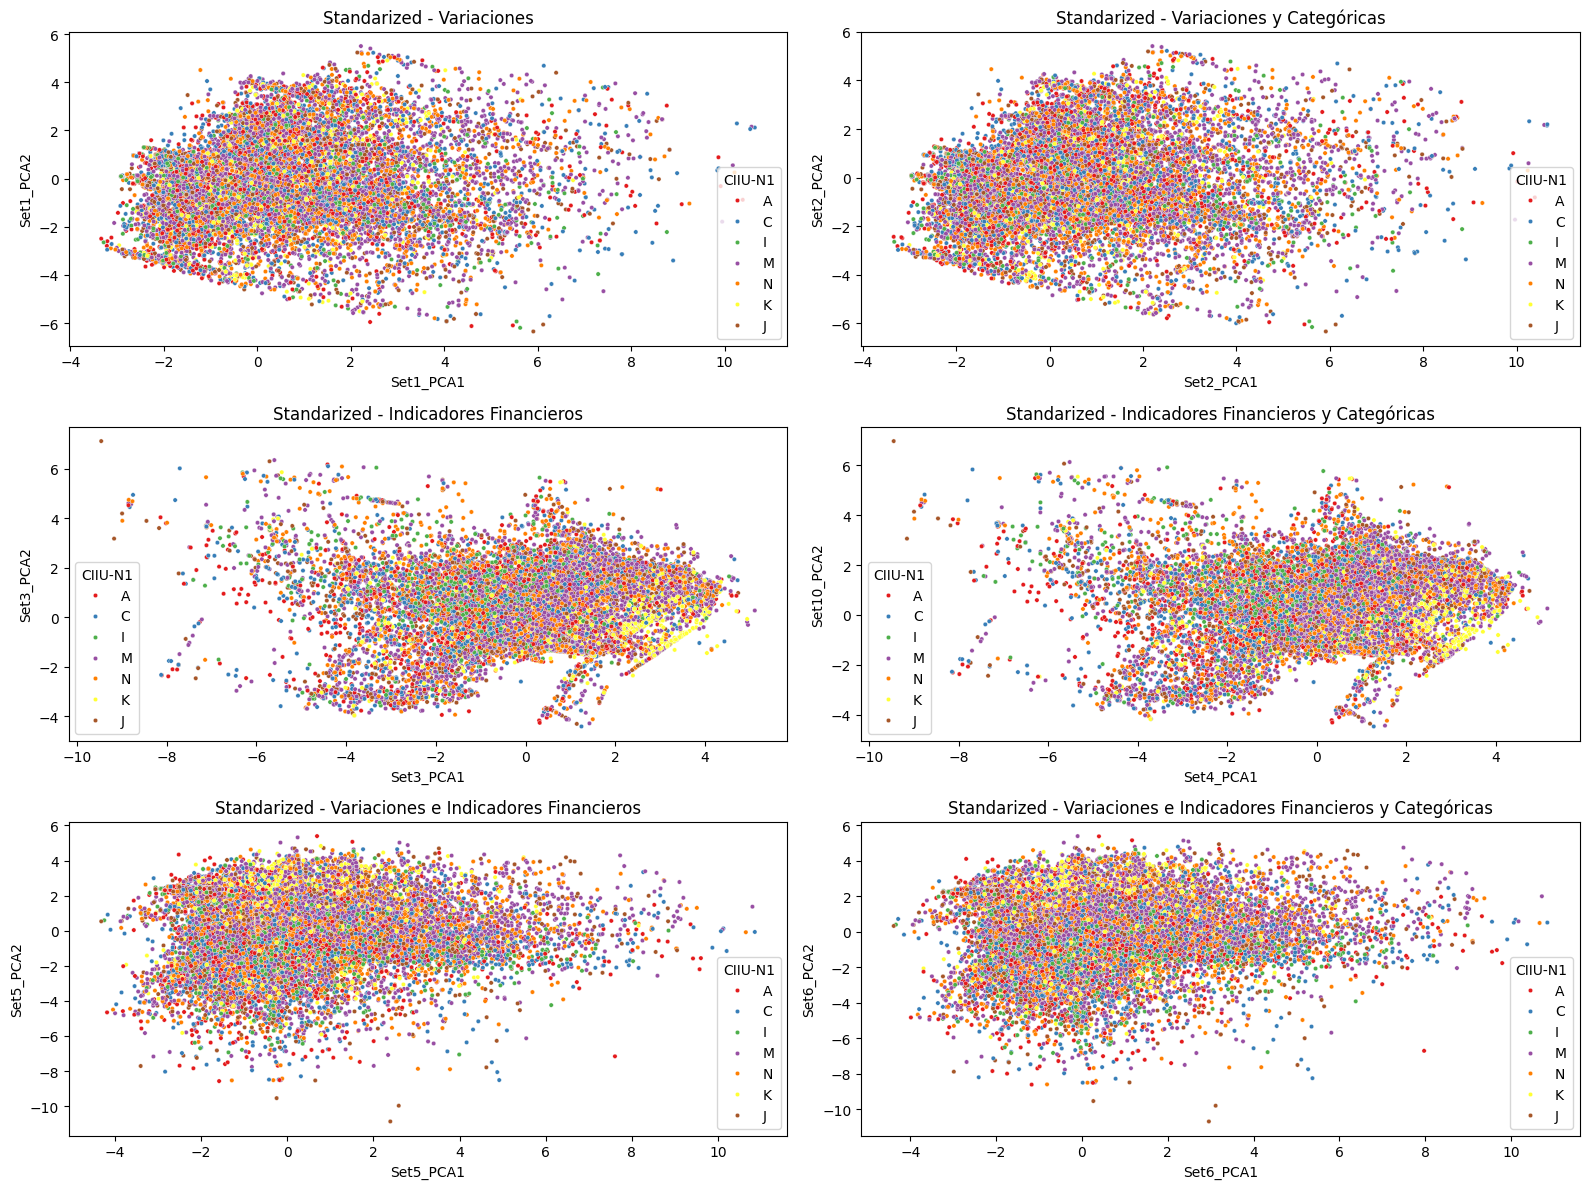

In [51]:
var_st_set1_to_pca = ['VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA']


var_st_set2_to_pca = ['VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA',
                       'REGION_COSTA','REGION_GALÁPAGOS','REGION_ORIENTE','REGION_SIERRA',
                       'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N',
                       'SEGMENTO_ENCODED']

var_st_set3_to_pca = ['IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA']

var_st_set4_to_pca = ['IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA',
                      'REGION_COSTA','REGION_GALÁPAGOS','REGION_ORIENTE','REGION_SIERRA',
                      'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N',
                      'SEGMENTO_ENCODED']

var_st_set5_to_pca = ['VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA',
                      'IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA']

var_st_set6_to_pca = ['VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA',
                      'IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA',
                      'REGION_COSTA','REGION_GALÁPAGOS','REGION_ORIENTE','REGION_SIERRA',
                      'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N',
                      'SEGMENTO_ENCODED']


pd_companias_standar_with_pca_set_1 = generar_2_pca_auto(pd_companias_standardized, var_st_set1_to_pca, 'Set1_PCA1', 'Set1_PCA2')
pd_companias_standar_with_pca_set_2 = generar_2_pca_auto(pd_companias_standardized, var_st_set2_to_pca, 'Set2_PCA1', 'Set2_PCA2')
pd_companias_standar_with_pca_set_3 = generar_2_pca_auto(pd_companias_standardized, var_st_set3_to_pca, 'Set3_PCA1', 'Set3_PCA2')
pd_companias_standar_with_pca_set_4 = generar_2_pca_auto(pd_companias_standardized, var_st_set4_to_pca, 'Set4_PCA1', 'Set10_PCA2')
pd_companias_standar_with_pca_set_5 = generar_2_pca_auto(pd_companias_standardized, var_st_set5_to_pca, 'Set5_PCA1', 'Set5_PCA2')
pd_companias_standar_with_pca_set_6 = generar_2_pca_auto(pd_companias_standardized, var_st_set6_to_pca, 'Set6_PCA1', 'Set6_PCA2')

fig, axes = plt.subplots(3, 2, figsize=(16, 12))  # 3 fila y 2 columnas

# Primer gráfico
sns.scatterplot(x='Set1_PCA1', y='Set1_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_1, palette='Set1', s=10, ax=axes[0, 0])
axes[0, 0].set_title('Standarized - Variaciones')
axes[0, 0].legend(title="CIIU-N1")
# axes[0, 0].set_ylim(-0.05, 0.05)
# axes[0, 0].set_xlim(-2, 10)

sns.scatterplot(x='Set2_PCA1', y='Set2_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_2, palette='Set1', s=10, ax=axes[0, 1])
axes[0, 1].set_title('Standarized - Variaciones y Categóricas')
axes[0, 1].legend(title="CIIU-N1")
# axes[0, 1].set_ylim(-0.025, 0.025)
# axes[0, 1].set_xlim(-0.025, 0.025)

sns.scatterplot(x='Set3_PCA1', y='Set3_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_3, palette='Set1', s=10, ax=axes[1, 0])
axes[1, 0].set_title('Standarized - Indicadores Financieros')
axes[1, 0].legend(title="CIIU-N1")
# axes[1, 0].set_ylim(-5, 5)
# axes[1, 0].set_xlim(-10, 50)

sns.scatterplot(x='Set4_PCA1', y='Set10_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_4, palette='Set1', s=10, ax=axes[1, 1])
axes[1, 1].set_title('Standarized - Indicadores Financieros y Categóricas')
axes[1, 1].legend(title="CIIU-N1")
# axes[1, 1].set_ylim(-5, 5)
# axes[1, 1].set_xlim(-2, 10)

sns.scatterplot(x='Set5_PCA1', y='Set5_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_5, palette='Set1', s=10, ax=axes[2, 0])
axes[2, 0].set_title('Standarized - Variaciones e Indicadores Financieros')
axes[2, 0].legend(title="CIIU-N1")
# axes[1, 0].set_ylim(-5, 5)
# axes[1, 0].set_xlim(-10, 50)

sns.scatterplot(x='Set6_PCA1', y='Set6_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_6, palette='Set1', s=10, ax=axes[2, 1])
axes[2, 1].set_title('Standarized - Variaciones e Indicadores Financieros y Categóricas')
axes[2, 1].legend(title="CIIU-N1")
# axes[1, 1].set_ylim(-5, 5)
# axes[1, 1].set_xlim(-2, 10)

plt.tight_layout()
plt.show()


### Experimento 2 - PCA - Cuentas de 2022 y 2023

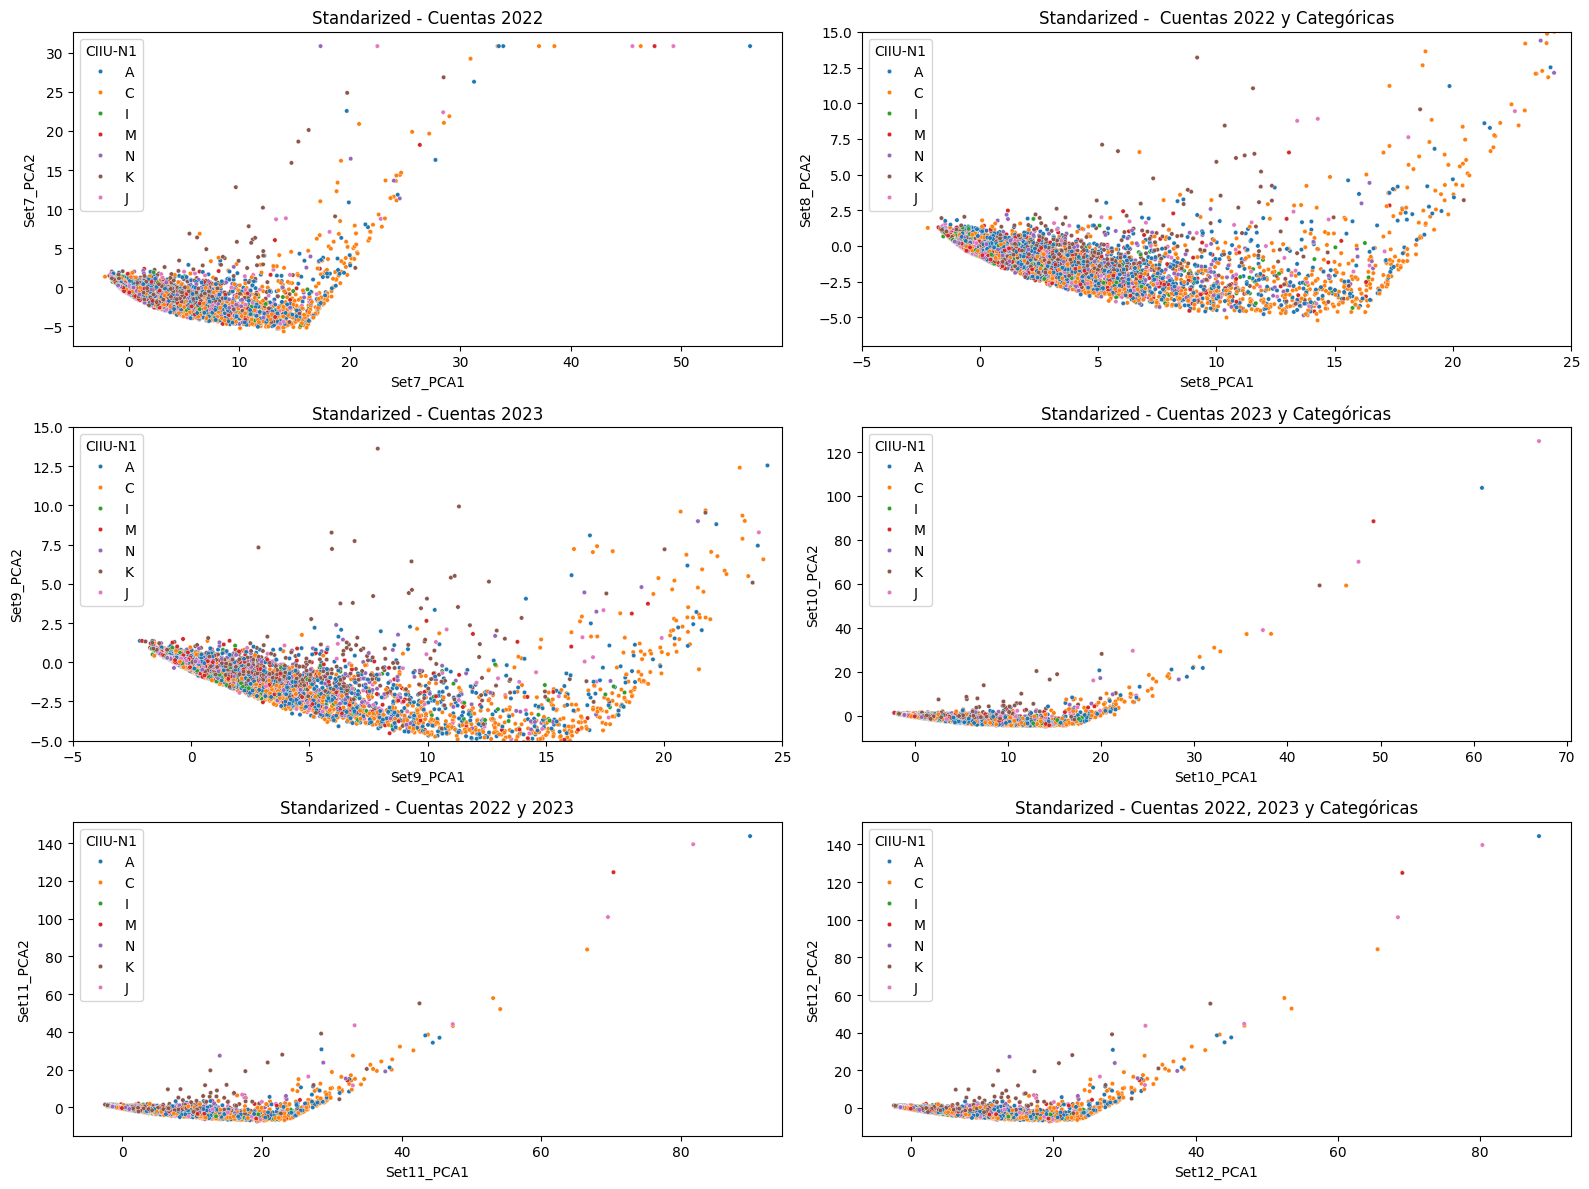

In [52]:
var_st_set7_to_pca = ['ACTIVO_2022', 'ACTIVO_CORRIENTE_2022', 'INVENTARIOS_2022', 'ACTIVOS_NO_CORRIENTES_2022', 'PASIVO_2022', 'PASIVO_CORRIENTE_2022', 'PASIVO_NO_CORRIENTE_2022', 'PATRIMONIO_NETO_2022',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2022', 'GANANCIA_BRUTA_2022', 'OTROS_INGRESOS_2022', 'COSTO_VENTAS_PRODUCCION_2022', 'GASTOS_2022',
                      'UTILIDAD_OPERATIVA_2022', 'IMPUESTO_RENTA_2022','UTILIDAD_NETA_2022']

var_st_set8_to_pca = ['ACTIVO_2022', 'ACTIVO_CORRIENTE_2022', 'INVENTARIOS_2022', 'ACTIVOS_NO_CORRIENTES_2022', 'PASIVO_2022', 'PASIVO_CORRIENTE_2022', 'PASIVO_NO_CORRIENTE_2022', 'PATRIMONIO_NETO_2022',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2022', 'GANANCIA_BRUTA_2022', 'OTROS_INGRESOS_2022', 'COSTO_VENTAS_PRODUCCION_2022', 'GASTOS_2022',
                      'UTILIDAD_OPERATIVA_2022', 'IMPUESTO_RENTA_2022','UTILIDAD_NETA_2022',
                      'REGION_COSTA','REGION_GALÁPAGOS','REGION_ORIENTE','REGION_SIERRA',
                      'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N', 'SEGMENTO_ENCODED']

var_st_set9_to_pca = ['ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                      'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023','UTILIDAD_NETA_2023']

var_st_set10_to_pca = ['ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                      'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023','UTILIDAD_NETA_2023',
                      'REGION_COSTA','REGION_GALÁPAGOS','REGION_ORIENTE','REGION_SIERRA',
                      'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N', 'SEGMENTO_ENCODED']

var_st_set11_to_pca = ['ACTIVO_2022', 'ACTIVO_CORRIENTE_2022', 'INVENTARIOS_2022', 'ACTIVOS_NO_CORRIENTES_2022', 'PASIVO_2022', 'PASIVO_CORRIENTE_2022', 'PASIVO_NO_CORRIENTE_2022', 'PATRIMONIO_NETO_2022',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2022', 'GANANCIA_BRUTA_2022', 'OTROS_INGRESOS_2022', 'COSTO_VENTAS_PRODUCCION_2022', 'GASTOS_2022',
                      'UTILIDAD_OPERATIVA_2022', 'IMPUESTO_RENTA_2022','UTILIDAD_NETA_2022',
                      'ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                      'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023','UTILIDAD_NETA_2023']

var_st_set12_to_pca = ['ACTIVO_2022', 'ACTIVO_CORRIENTE_2022', 'INVENTARIOS_2022', 'ACTIVOS_NO_CORRIENTES_2022', 'PASIVO_2022', 'PASIVO_CORRIENTE_2022', 'PASIVO_NO_CORRIENTE_2022', 'PATRIMONIO_NETO_2022',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2022', 'GANANCIA_BRUTA_2022', 'OTROS_INGRESOS_2022', 'COSTO_VENTAS_PRODUCCION_2022', 'GASTOS_2022',
                      'UTILIDAD_OPERATIVA_2022', 'IMPUESTO_RENTA_2022','UTILIDAD_NETA_2022',
                      'ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                      'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023','UTILIDAD_NETA_2023',
                      'REGION_COSTA','REGION_GALÁPAGOS','REGION_ORIENTE','REGION_SIERRA',
                      'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N', 'SEGMENTO_ENCODED']


pd_companias_standar_with_pca_set_7 = generar_2_pca_auto(pd_companias_standardized, var_st_set7_to_pca, 'Set7_PCA1', 'Set7_PCA2')
pd_companias_standar_with_pca_set_8 = generar_2_pca_auto(pd_companias_standardized, var_st_set8_to_pca, 'Set8_PCA1', 'Set8_PCA2')
pd_companias_standar_with_pca_set_9 = generar_2_pca_auto(pd_companias_standardized, var_st_set9_to_pca, 'Set9_PCA1', 'Set9_PCA2')
pd_companias_standar_with_pca_set_10 = generar_2_pca_auto(pd_companias_standardized, var_st_set10_to_pca, 'Set10_PCA1', 'Set10_PCA2')
pd_companias_standar_with_pca_set_11 = generar_2_pca_auto(pd_companias_standardized, var_st_set11_to_pca, 'Set11_PCA1', 'Set11_PCA2')
pd_companias_standar_with_pca_set_12 = generar_2_pca_auto(pd_companias_standardized, var_st_set12_to_pca, 'Set12_PCA1', 'Set12_PCA2')


#Prueba Controlando outliers
pd_companias_standar_with_pca_set_7 = eliminar_outliers_tecnica_iqr(pd_companias_standar_with_pca_set_7, ['Set7_PCA1', 'Set7_PCA2'],iqr_multiplier=1.5, lower_quantile=0.25, upper_quantile=0.999)


fig, axes = plt.subplots(3, 2, figsize=(16, 12))  # 1 fila y 2 columnas

# Primer gráfico
sns.scatterplot(x='Set7_PCA1', y='Set7_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_7, palette='tab10', s=10, ax=axes[0, 0])
axes[0, 0].set_title('Standarized - Cuentas 2022')
axes[0, 0].legend(title="CIIU-N1")
# axes[0, 0].set_ylim(-7, 15)
# axes[0, 0].set_xlim(-5, 25)

sns.scatterplot(x='Set8_PCA1', y='Set8_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_8, palette='tab10', s=10, ax=axes[0, 1])
axes[0, 1].set_title('Standarized -  Cuentas 2022 y Categóricas')
axes[0, 1].legend(title="CIIU-N1")
axes[0, 1].set_ylim(-7, 15)
axes[0, 1].set_xlim(-5, 25)

sns.scatterplot(x='Set9_PCA1', y='Set9_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_9, palette='tab10', s=10, ax=axes[1, 0])
axes[1, 0].set_title('Standarized - Cuentas 2023')
axes[1, 0].legend(title="CIIU-N1")
axes[1, 0].set_ylim(-5, 15)
axes[1, 0].set_xlim(-5, 25)

sns.scatterplot(x='Set10_PCA1', y='Set10_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_10, palette='tab10', s=10, ax=axes[1, 1])
axes[1, 1].set_title('Standarized - Cuentas 2023 y Categóricas')
axes[1, 1].legend(title="CIIU-N1")
# axes[1, 1].set_ylim(-5, 10)
# axes[1, 1].set_xlim(-2, 20)

sns.scatterplot(x='Set11_PCA1', y='Set11_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_11, palette='tab10', s=10, ax=axes[2, 0])
axes[2, 0].set_title('Standarized - Cuentas 2022 y 2023')
axes[2, 0].legend(title="CIIU-N1")
# axes[1, 0].set_ylim(-5, 10)
# axes[1, 0].set_xlim(-2, 20)

sns.scatterplot(x='Set12_PCA1', y='Set12_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_12, palette='tab10', s=10, ax=axes[2, 1])
axes[2, 1].set_title('Standarized - Cuentas 2022, 2023 y Categóricas')
axes[2, 1].legend(title="CIIU-N1")
# axes[1, 1].set_ylim(-5, 10)
# axes[1, 1].set_xlim(-2, 20)

plt.tight_layout()
plt.show()


+ Muy concentrado alrededor del punto (0, 0) y luego disperso a la derecha

In [53]:
Q1 = pd_companias_standar_with_pca_set_7['Set7_PCA1'].quantile(0.25) # Por defecto 25%
Q3 = pd_companias_standar_with_pca_set_7['Set7_PCA1'].quantile(0.999) # Por defecto 75%
# print(Q1)
# print(Q3)

In [54]:
# Ordenar el DataFrame por 'Set1_PCA1' y luego por 'Set1_PCA2', de mayor a menor
sorted_dataset = pd_companias_standar_with_pca_set_8.sort_values(
    by=['Set8_PCA1', 'Set8_PCA2'], 
    ascending=[False, False]
)
# Seleccionar los primeros 10 resultados
top_10_results = sorted_dataset[['RUC', 'Set8_PCA1', 'Set8_PCA2']].head(10)
# Imprimir los resultados
print(top_10_results)


                RUC  Set8_PCA1   Set8_PCA2
1059  0991257721001  61.499186  100.770631
2488  1791256115001  47.703947   74.151007
5117  1791844416001  45.931419   82.418998
386   1790319857001  44.975536   60.129185
2478  1791251237001  44.193189   68.120957
49    1390012949001  37.566831   45.188670
3866  0991295437001  36.282894   36.797560
2101  0990608504001  33.189900   32.318711
482   0990326606001  32.791081   35.242230
1     1790004724001  32.682502   32.573189


### PCA 3 - Combinación Completa de variables

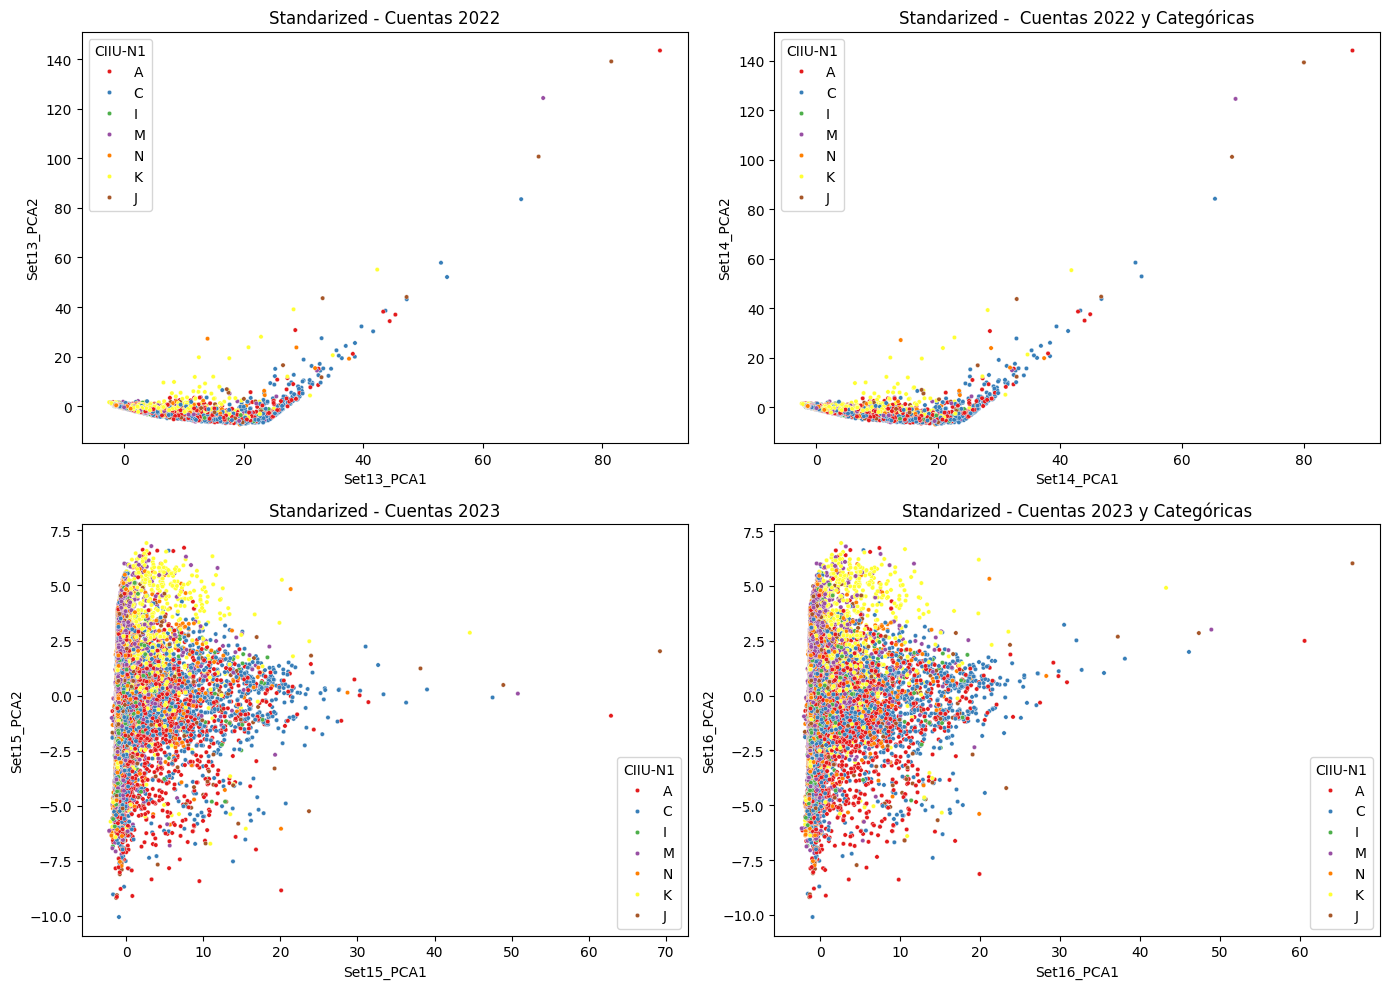

In [55]:
var_st_set13_to_pca = ['ACTIVO_2022', 'ACTIVO_CORRIENTE_2022', 'INVENTARIOS_2022', 'ACTIVOS_NO_CORRIENTES_2022', 'PASIVO_2022', 'PASIVO_CORRIENTE_2022', 'PASIVO_NO_CORRIENTE_2022', 'PATRIMONIO_NETO_2022',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2022', 'GANANCIA_BRUTA_2022', 'OTROS_INGRESOS_2022', 'COSTO_VENTAS_PRODUCCION_2022', 'GASTOS_2022',
                      'UTILIDAD_OPERATIVA_2022', 'IMPUESTO_RENTA_2022','UTILIDAD_NETA_2022',
                      'ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                      'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023','UTILIDAD_NETA_2023',
                      'VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA',
                      'IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA',
                      ]

var_st_set14_to_pca = ['ACTIVO_2022', 'ACTIVO_CORRIENTE_2022', 'INVENTARIOS_2022', 'ACTIVOS_NO_CORRIENTES_2022', 'PASIVO_2022', 'PASIVO_CORRIENTE_2022', 'PASIVO_NO_CORRIENTE_2022', 'PATRIMONIO_NETO_2022',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2022', 'GANANCIA_BRUTA_2022', 'OTROS_INGRESOS_2022', 'COSTO_VENTAS_PRODUCCION_2022', 'GASTOS_2022',
                      'UTILIDAD_OPERATIVA_2022', 'IMPUESTO_RENTA_2022','UTILIDAD_NETA_2022',
                      'ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                      'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023','UTILIDAD_NETA_2023',
                      'VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA',
                      'IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA',
                      'REGION_COSTA','REGION_GALÁPAGOS','REGION_ORIENTE','REGION_SIERRA',
                      'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N',
                      'SEGMENTO_ENCODED']

var_st_set15_to_pca = ['ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                      'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023','UTILIDAD_NETA_2023',
                      #'VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA',
                      'IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA',
                      ]

var_st_set16_to_pca = ['ACTIVO_2023', 'ACTIVO_CORRIENTE_2023', 'INVENTARIOS_2023', 'ACTIVOS_NO_CORRIENTES_2023', 'PASIVO_2023', 'PASIVO_CORRIENTE_2023', 'PASIVO_NO_CORRIENTE_2023', 'PATRIMONIO_NETO_2023',
                      'INGRESOS_ACTIVIDADES_ORDINARIAS_2023', 'GANANCIA_BRUTA_2023', 'OTROS_INGRESOS_2023', 'COSTO_VENTAS_PRODUCCION_2023', 'GASTOS_2023',
                      'UTILIDAD_OPERATIVA_2023', 'IMPUESTO_RENTA_2023','UTILIDAD_NETA_2023',
                      #'VAR_ACTIVO', 'VAR_INVENTARIOS', 'VAR_PASIVO', 'VAR_INGRESOS', 'VAR_COSTO_VENTAS_PRODUCCION', 'VAR_GASTOS', 'VAR_UTILIDAD_OPERATIVA', 'VAR_IMPUESTO_RENTA', 'VAR_UTILIDAD_NETA',
                      'IF_PRUEBA_ACIDA','IF_ENDEUDAMIENTO_ACTIVO','IF_APALANCAMIENTO','IF_ROTACION_VENTAS','IF_MARGEN_BRUTO','IF_MARGEN_OPERACIONAL','IF_MARGEN_NETO','IF_ROE','IF_ROA',
                      'REGION_COSTA','REGION_GALÁPAGOS','REGION_ORIENTE','REGION_SIERRA',
                      'CIIU_NIVEL_1_A', 'CIIU_NIVEL_1_C', 'CIIU_NIVEL_1_I', 'CIIU_NIVEL_1_J', 'CIIU_NIVEL_1_K', 'CIIU_NIVEL_1_M', 'CIIU_NIVEL_1_N',
                      'SEGMENTO_ENCODED']

pd_companias_standar_with_pca_set_13 = generar_2_pca_auto(pd_companias_standardized, var_st_set13_to_pca, 'Set13_PCA1', 'Set13_PCA2')
pd_companias_standar_with_pca_set_14 = generar_2_pca_auto(pd_companias_standardized, var_st_set14_to_pca, 'Set14_PCA1', 'Set14_PCA2')
pd_companias_standar_with_pca_set_15 = generar_2_pca_auto(pd_companias_standardized, var_st_set15_to_pca, 'Set15_PCA1', 'Set15_PCA2')
pd_companias_standar_with_pca_set_16 = generar_2_pca_auto(pd_companias_standardized, var_st_set16_to_pca, 'Set16_PCA1', 'Set16_PCA2')


fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 1 fila y 2 columnas

# Primer gráfico
sns.scatterplot(x='Set13_PCA1', y='Set13_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_13, palette='Set1', s=10, ax=axes[0, 0])
axes[0, 0].set_title('Standarized - Cuentas 2022')
axes[0, 0].legend(title="CIIU-N1")
# axes[0, 0].set_ylim(-10, 15)
# axes[0, 0].set_xlim(-5, 7)

sns.scatterplot(x='Set14_PCA1', y='Set14_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_14, palette='Set1', s=10, ax=axes[0, 1])
axes[0, 1].set_title('Standarized -  Cuentas 2022 y Categóricas')
axes[0, 1].legend(title="CIIU-N1")
# axes[0, 1].set_ylim(-5, 10)
# axes[0, 1].set_xlim(-2, 20)

sns.scatterplot(x='Set15_PCA1', y='Set15_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_15, palette='Set1', s=10, ax=axes[1, 0])
axes[1, 0].set_title('Standarized - Cuentas 2023')
axes[1, 0].legend(title="CIIU-N1")
# axes[1, 0].set_ylim(-5, 10)
# axes[1, 0].set_xlim(-2, 20)

sns.scatterplot(x='Set16_PCA1', y='Set16_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_16, palette='Set1', s=10, ax=axes[1, 1])
axes[1, 1].set_title('Standarized - Cuentas 2023 y Categóricas')
axes[1, 1].legend(title="CIIU-N1")
# axes[1, 1].set_ylim(-5, 10)
# axes[1, 1].set_xlim(-2, 20)


plt.tight_layout()
plt.show()


### Experimento 4 - PCA - Indicadores Financieros por Regiones

(19443, 85)
(17497, 85)
(626, 85)
(318, 85)
(37884, 85)


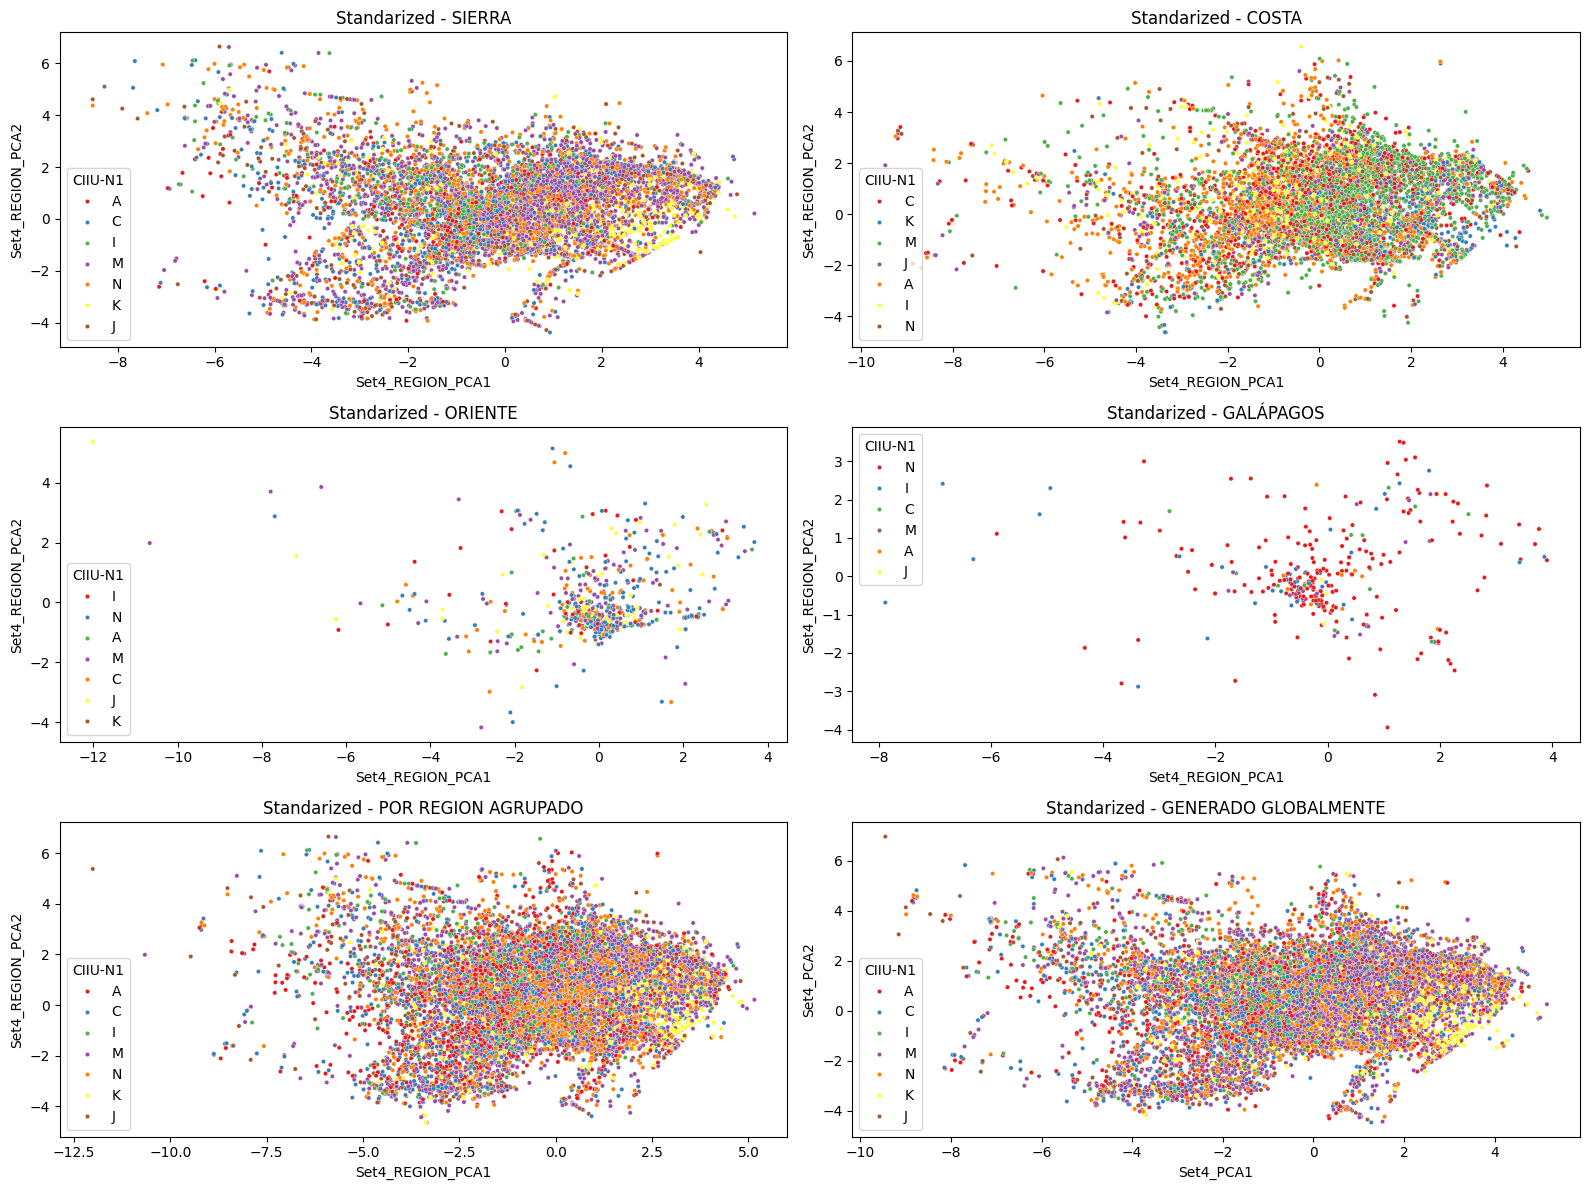

In [56]:
# Generar PCA con el dataset completo estandarizado
pd_companias_standar_with_pca_set_4 = generar_2_pca_auto(pd_companias_standardized, var_st_set4_to_pca, 'Set4_PCA1', 'Set4_PCA2')

# pd_companias_standar_with_pca_set_10_sierra = pd_companias_standar_with_pca_set_10[pd_companias_standar_with_pca_set_10 ['PROVINCIA']=='AZUAY']
# print(pd_companias_standar_with_pca_set_10_sierra.shape)


# pd_companias_standar_with_pca_set_10_1 = pd_companias_standar_with_pca_set_10[pd_companias_standar_with_pca_set_10 ['PROVINCIA']=='AZUAY']
# print(pd_companias_standar_with_pca_set_10_1.shape)

# Generar PCA con el dataset completo estandarizado por Regiones
pd_companias_standardized_sierra = pd_companias_standardized[pd_companias_standardized['REGION']=='SIERRA']
pd_companias_standardized_costa = pd_companias_standardized[pd_companias_standardized['REGION']=='COSTA']
pd_companias_standardized_oriente = pd_companias_standardized[pd_companias_standardized['REGION']=='ORIENTE']
pd_companias_standardized_galapagos = pd_companias_standardized[pd_companias_standardized['REGION']=='GALÁPAGOS']

pd_companias_standar_with_pca_set_4_sierra = generar_2_pca_auto(pd_companias_standardized_sierra, var_st_set4_to_pca, 'Set4_REGION_PCA1', 'Set4_REGION_PCA2')
print(pd_companias_standar_with_pca_set_4_sierra.shape)
pd_companias_standar_with_pca_set_4_costa = generar_2_pca_auto(pd_companias_standardized_costa, var_st_set4_to_pca, 'Set4_REGION_PCA1', 'Set4_REGION_PCA2')
print(pd_companias_standar_with_pca_set_4_costa.shape)
pd_companias_standar_with_pca_set_4_oriente = generar_2_pca_auto(pd_companias_standardized_oriente, var_st_set4_to_pca, 'Set4_REGION_PCA1', 'Set4_REGION_PCA2')
print(pd_companias_standar_with_pca_set_4_oriente.shape)
pd_companias_standar_with_pca_set_4_galapagos = generar_2_pca_auto(pd_companias_standardized_galapagos, var_st_set4_to_pca, 'Set4_REGION_PCA1', 'Set4_REGION_PCA2')
print(pd_companias_standar_with_pca_set_4_galapagos.shape)


# Unificar los 3 datasets
pd_companias_standar_with_pca_set_4_region = pd.concat(
    [
        pd_companias_standar_with_pca_set_4_sierra,
        pd_companias_standar_with_pca_set_4_costa,
        pd_companias_standar_with_pca_set_4_oriente,
        pd_companias_standar_with_pca_set_4_galapagos
    ],
    axis=0,  # Combinar filas
    ignore_index=True  # Reindexar el DataFrame Set10_PCA2
)

# Verificar el tamaño del DataFrame combinado
print(pd_companias_standar_with_pca_set_4_region.shape)


fig, axes = plt.subplots(3, 2, figsize=(16, 12))  # 3 fila y 2 columnas

# Primer gráfico
sns.scatterplot(x='Set4_REGION_PCA1', y='Set4_REGION_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_4_sierra, palette='Set1', s=10, ax=axes[0, 0])
axes[0, 0].set_title('Standarized - SIERRA')
axes[0, 0].legend(title="CIIU-N1")
# axes[0, 0].set_ylim(-0.05, 0.05)
# axes[0, 0].set_xlim(-2, 10)

sns.scatterplot(x='Set4_REGION_PCA1', y='Set4_REGION_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_4_costa, palette='Set1', s=10, ax=axes[0, 1])
axes[0, 1].set_title('Standarized - COSTA')
axes[0, 1].legend(title="CIIU-N1")
# axes[0, 1].set_ylim(-0.025, 0.025)
# axes[0, 1].set_xlim(-0.025, 0.025)

sns.scatterplot(x='Set4_REGION_PCA1', y='Set4_REGION_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_4_oriente, palette='Set1', s=10, ax=axes[1, 0])
axes[1, 0].set_title('Standarized - ORIENTE')
axes[1, 0].legend(title="CIIU-N1")
# axes[1, 0].set_ylim(-5, 5)
# axes[1, 0].set_xlim(-10, 50)

sns.scatterplot(x='Set4_REGION_PCA1', y='Set4_REGION_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_4_galapagos, palette='Set1', s=10, ax=axes[1, 1])
axes[1, 1].set_title('Standarized - GALÁPAGOS')
axes[1, 1].legend(title="CIIU-N1")
# axes[1, 1].set_ylim(-5, 5)
# axes[1, 1].set_xlim(-2, 10)

sns.scatterplot(x='Set4_REGION_PCA1', y='Set4_REGION_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_4_region, palette='Set1', s=10, ax=axes[2, 0])
axes[2, 0].set_title('Standarized - POR REGION AGRUPADO')
axes[2, 0].legend(title="CIIU-N1")
# axes[1, 0].set_ylim(-5, 5)
# axes[1, 0].set_xlim(-10, 50)

sns.scatterplot(x='Set4_PCA1', y='Set4_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_4, palette='Set1', s=10, ax=axes[2, 1])
axes[2, 1].set_title('Standarized - GENERADO GLOBALMENTE')
axes[2, 1].legend(title="CIIU-N1")
# axes[1, 1].set_ylim(-5, 5)
# axes[1, 1].set_xlim(-2, 10)

plt.tight_layout()
plt.show()


### ** Experimento 5 - PCA - Cuentas 2023 Por Región **
#### Se selecciona en la iteración 2, luego se descarta porque limita el cálculo del Location Quotient
#### Únicamente se selecciona el Set_10

Este conjunto de datos es el que se selecciona

(19443, 85)
(17497, 85)
(626, 85)
(318, 85)
(37884, 85)


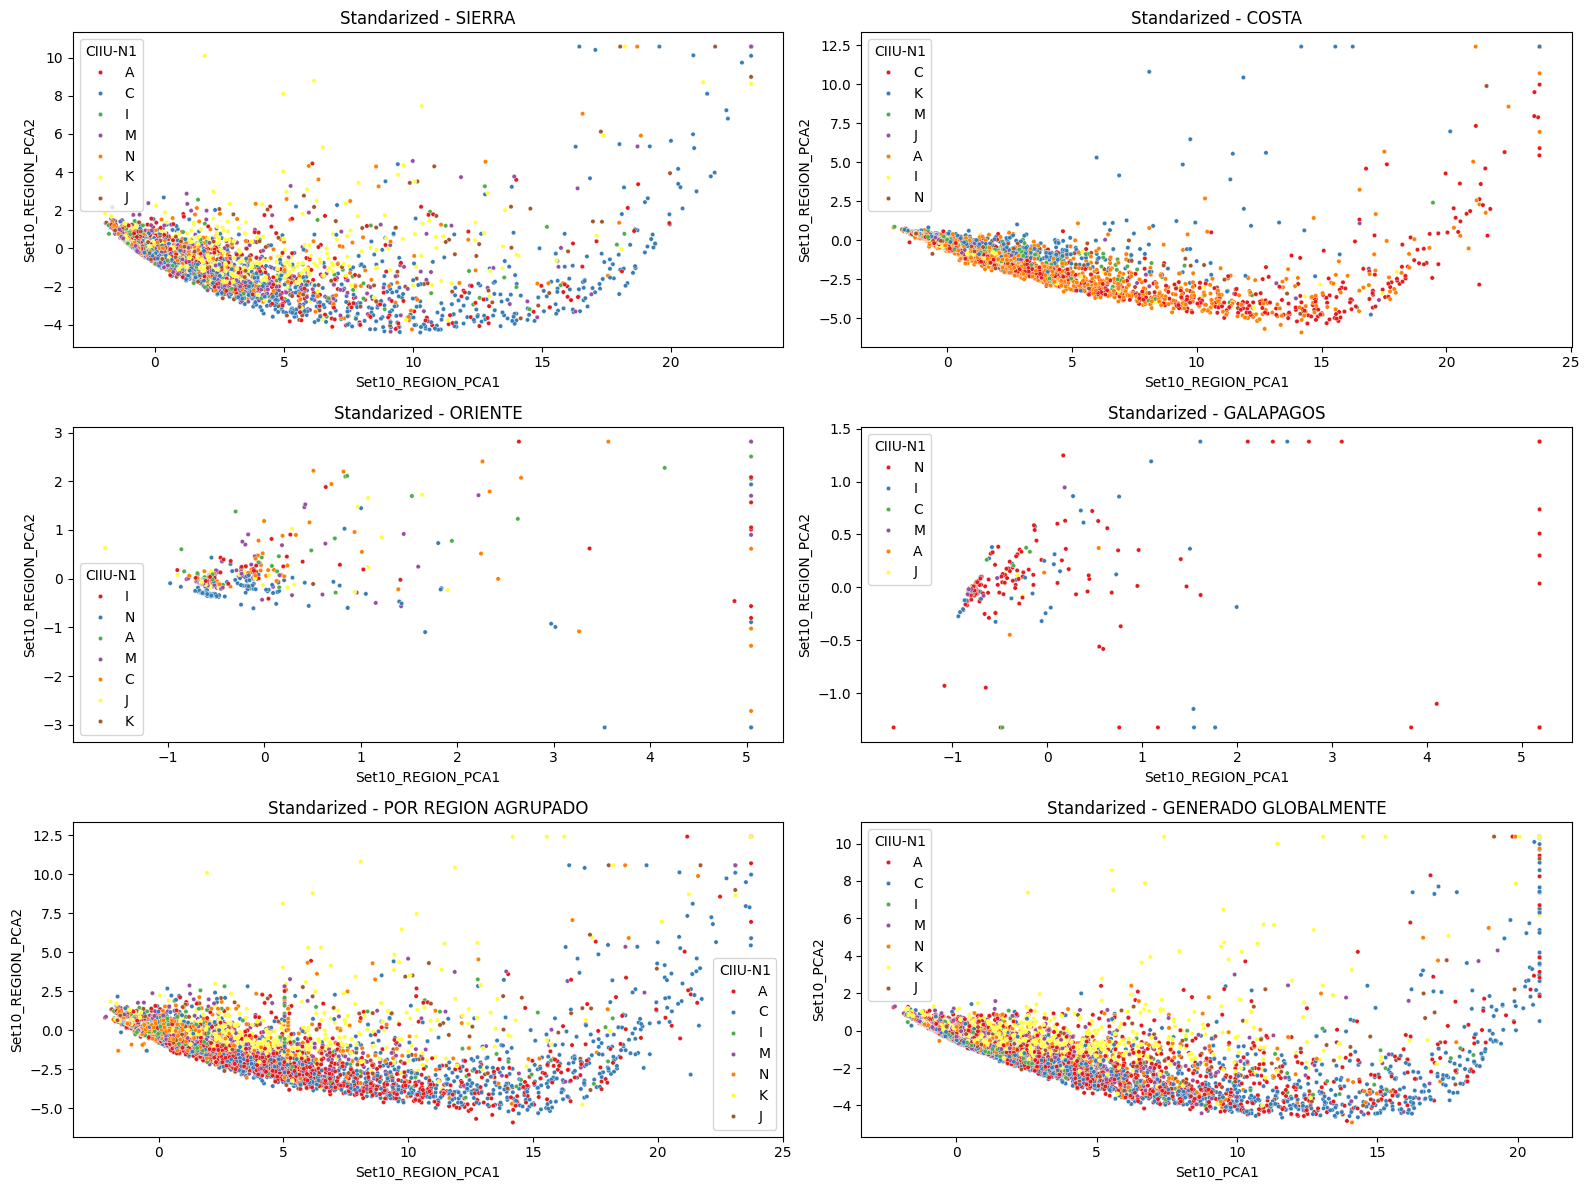

In [57]:
# Generar PCA con el dataset completo estandarizado
pd_companias_standar_with_pca_set_10 = generar_2_pca_auto(pd_companias_standardized, var_st_set10_to_pca, 'Set10_PCA1', 'Set10_PCA2')

# Generar PCA con el dataset completo estandarizado por Regiones
pd_companias_standardized_sierra = pd_companias_standardized[pd_companias_standardized['REGION']=='SIERRA']
pd_companias_standardized_costa = pd_companias_standardized[pd_companias_standardized['REGION']=='COSTA']
pd_companias_standardized_oriente = pd_companias_standardized[pd_companias_standardized['REGION']=='ORIENTE']
pd_companias_standardized_galapagos = pd_companias_standardized[pd_companias_standardized['REGION']=='GALÁPAGOS']

pd_companias_standar_with_pca_set_10_sierra = generar_2_pca_auto(pd_companias_standardized_sierra, var_st_set10_to_pca, 'Set10_REGION_PCA1', 'Set10_REGION_PCA2')
print(pd_companias_standar_with_pca_set_10_sierra.shape)
pd_companias_standar_with_pca_set_10_costa = generar_2_pca_auto(pd_companias_standardized_costa, var_st_set10_to_pca, 'Set10_REGION_PCA1', 'Set10_REGION_PCA2')
print(pd_companias_standar_with_pca_set_10_costa.shape)
pd_companias_standar_with_pca_set_10_oriente = generar_2_pca_auto(pd_companias_standardized_oriente, var_st_set10_to_pca, 'Set10_REGION_PCA1', 'Set10_REGION_PCA2')
print(pd_companias_standar_with_pca_set_10_oriente.shape)
pd_companias_standar_with_pca_set_10_galapagos = generar_2_pca_auto(pd_companias_standardized_galapagos, var_st_set10_to_pca, 'Set10_REGION_PCA1', 'Set10_REGION_PCA2')
print(pd_companias_standar_with_pca_set_10_galapagos.shape)


# Control outliers
pd_companias_standar_with_pca_set_10 = eliminar_outliers_tecnica_iqr(pd_companias_standar_with_pca_set_10, ['Set10_PCA1', 'Set10_PCA2'],iqr_multiplier=25)

pd_companias_standar_with_pca_set_10_sierra = eliminar_outliers_tecnica_iqr(pd_companias_standar_with_pca_set_10_sierra, ['Set10_REGION_PCA1', 'Set10_REGION_PCA2'],iqr_multiplier=30)
pd_companias_standar_with_pca_set_10_costa = eliminar_outliers_tecnica_iqr(pd_companias_standar_with_pca_set_10_costa, ['Set10_REGION_PCA1', 'Set10_REGION_PCA2'],iqr_multiplier=25)
pd_companias_standar_with_pca_set_10_oriente = eliminar_outliers_tecnica_iqr(pd_companias_standar_with_pca_set_10_oriente, ['Set10_REGION_PCA1', 'Set10_REGION_PCA2'],iqr_multiplier=10)
pd_companias_standar_with_pca_set_10_galapagos = eliminar_outliers_tecnica_iqr(pd_companias_standar_with_pca_set_10_galapagos, ['Set10_REGION_PCA1', 'Set10_REGION_PCA2'],iqr_multiplier=10) 


# Unificar los 3 datasets
pd_companias_standar_with_pca_set_10_region = pd.concat(
    [
        pd_companias_standar_with_pca_set_10_sierra,
        pd_companias_standar_with_pca_set_10_costa,
        pd_companias_standar_with_pca_set_10_oriente,
        pd_companias_standar_with_pca_set_10_galapagos
    ],
    axis=0,  # Combinar filas
    ignore_index=True  # Reindexar el DataFrame Set10_PCA2
)

# Verificar el tamaño del DataFrame combinado
print(pd_companias_standar_with_pca_set_10_region.shape)


fig, axes = plt.subplots(3, 2, figsize=(16, 12))  # 3 fila y 2 columnas

# Primer gráfico
sns.scatterplot(x='Set10_REGION_PCA1', y='Set10_REGION_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_10_sierra, palette='Set1', s=10, ax=axes[0, 0])
axes[0, 0].set_title('Standarized - SIERRA')
axes[0, 0].legend(title="CIIU-N1")
# axes[0, 0].set_ylim(-0.05, 0.05)
# axes[0, 0].set_xlim(-2, 10)

sns.scatterplot(x='Set10_REGION_PCA1', y='Set10_REGION_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_10_costa, palette='Set1', s=10, ax=axes[0, 1])
axes[0, 1].set_title('Standarized - COSTA')
axes[0, 1].legend(title="CIIU-N1")
# axes[0, 1].set_ylim(-0.025, 0.025)
# axes[0, 1].set_xlim(-0.025, 0.025)

sns.scatterplot(x='Set10_REGION_PCA1', y='Set10_REGION_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_10_oriente, palette='Set1', s=10, ax=axes[1, 0])
axes[1, 0].set_title('Standarized - ORIENTE')
axes[1, 0].legend(title="CIIU-N1")
# axes[1, 0].set_ylim(-5, 5)
# axes[1, 0].set_xlim(-10, 50)

sns.scatterplot(x='Set10_REGION_PCA1', y='Set10_REGION_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_10_galapagos, palette='Set1', s=10, ax=axes[1, 1])
axes[1, 1].set_title('Standarized - GALAPAGOS')
axes[1, 1].legend(title="CIIU-N1")
# axes[1, 1].set_ylim(-5, 5)
# axes[1, 1].set_xlim(-2, 10)

sns.scatterplot(x='Set10_REGION_PCA1', y='Set10_REGION_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_10_region, palette='Set1', s=10, ax=axes[2, 0])
axes[2, 0].set_title('Standarized - POR REGION AGRUPADO')
axes[2, 0].legend(title="CIIU-N1")
# axes[1, 0].set_ylim(-5, 5)
# axes[1, 0].set_xlim(-10, 50)

sns.scatterplot(x='Set10_PCA1', y='Set10_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_10, palette='Set1', s=10, ax=axes[2, 1])
axes[2, 1].set_title('Standarized - GENERADO GLOBALMENTE')
axes[2, 1].legend(title="CIIU-N1")
# # axes[1, 1].set_ylim(-5, 5)
# # axes[1, 1].set_xlim(-2, 10)

plt.tight_layout()
plt.show()


C:\Users\fabrizio\AppData\Local\Temp\ipykernel_19232\2164177852.py:16: UserWarning: The palette list has more values (9) than needed (7), which may not be intended.
  sns.scatterplot(


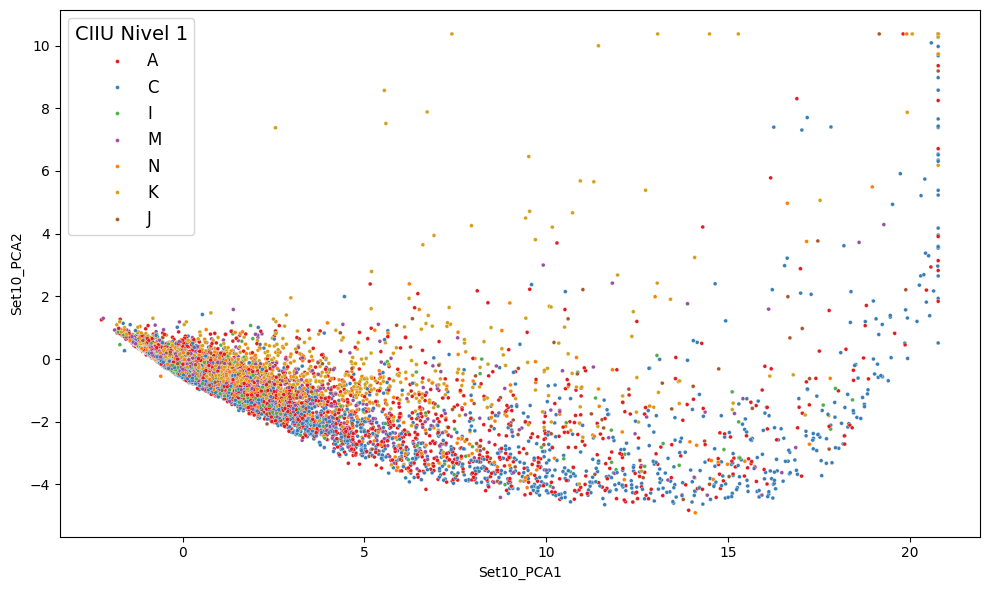

In [58]:
Set1_palette_updated = [
    "#E41A1C",  # Rojo
    "#377EB8",  # Azul
    "#4DAF4A",  # Verde
    "#984EA3",  # Púrpura
    "#FF7F00",  # Naranja
    "#D4A017",  # Amarillo intenso/caramelo
    "#A65628",  # Marrón
    "#F781BF",  # Rosa
    "#999999",  # Gris
]

plt.figure(figsize=(10, 6))  # Tamaño del gráfico

# Crear el scatter plot
sns.scatterplot(
    x='Set10_PCA1', 
    y='Set10_PCA2', 
    hue='CIIU_NIVEL_1', 
    data=pd_companias_standar_with_pca_set_10, 
    palette=Set1_palette_updated,
    s=8
)

# Agregar título y leyenda
# plt.title('Gráfico de dispersión de los 2 componentes generados con PCA', fontsize=16)
plt.title('', fontsize=16)
plt.legend(title="CIIU Nivel 1", fontsize=12, title_fontsize=14)

# Ajustar los límites si es necesario (descomenta las siguientes líneas)
# plt.ylim(-5, 5)
# plt.xlim(-2, 10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

### Experimento 6 - PCA - Segmento Compañía Cuentas 2023

In [59]:
pd_companias_standardized['SEGMENTO'].value_counts()

SEGMENTO
MICRO      20794
PEQUENA    11824
MEDIANA     3654
GRANDE      1612
Name: count, dtype: int64

(20794, 85)
(11824, 85)
(3654, 85)
(1612, 85)
(37884, 85)


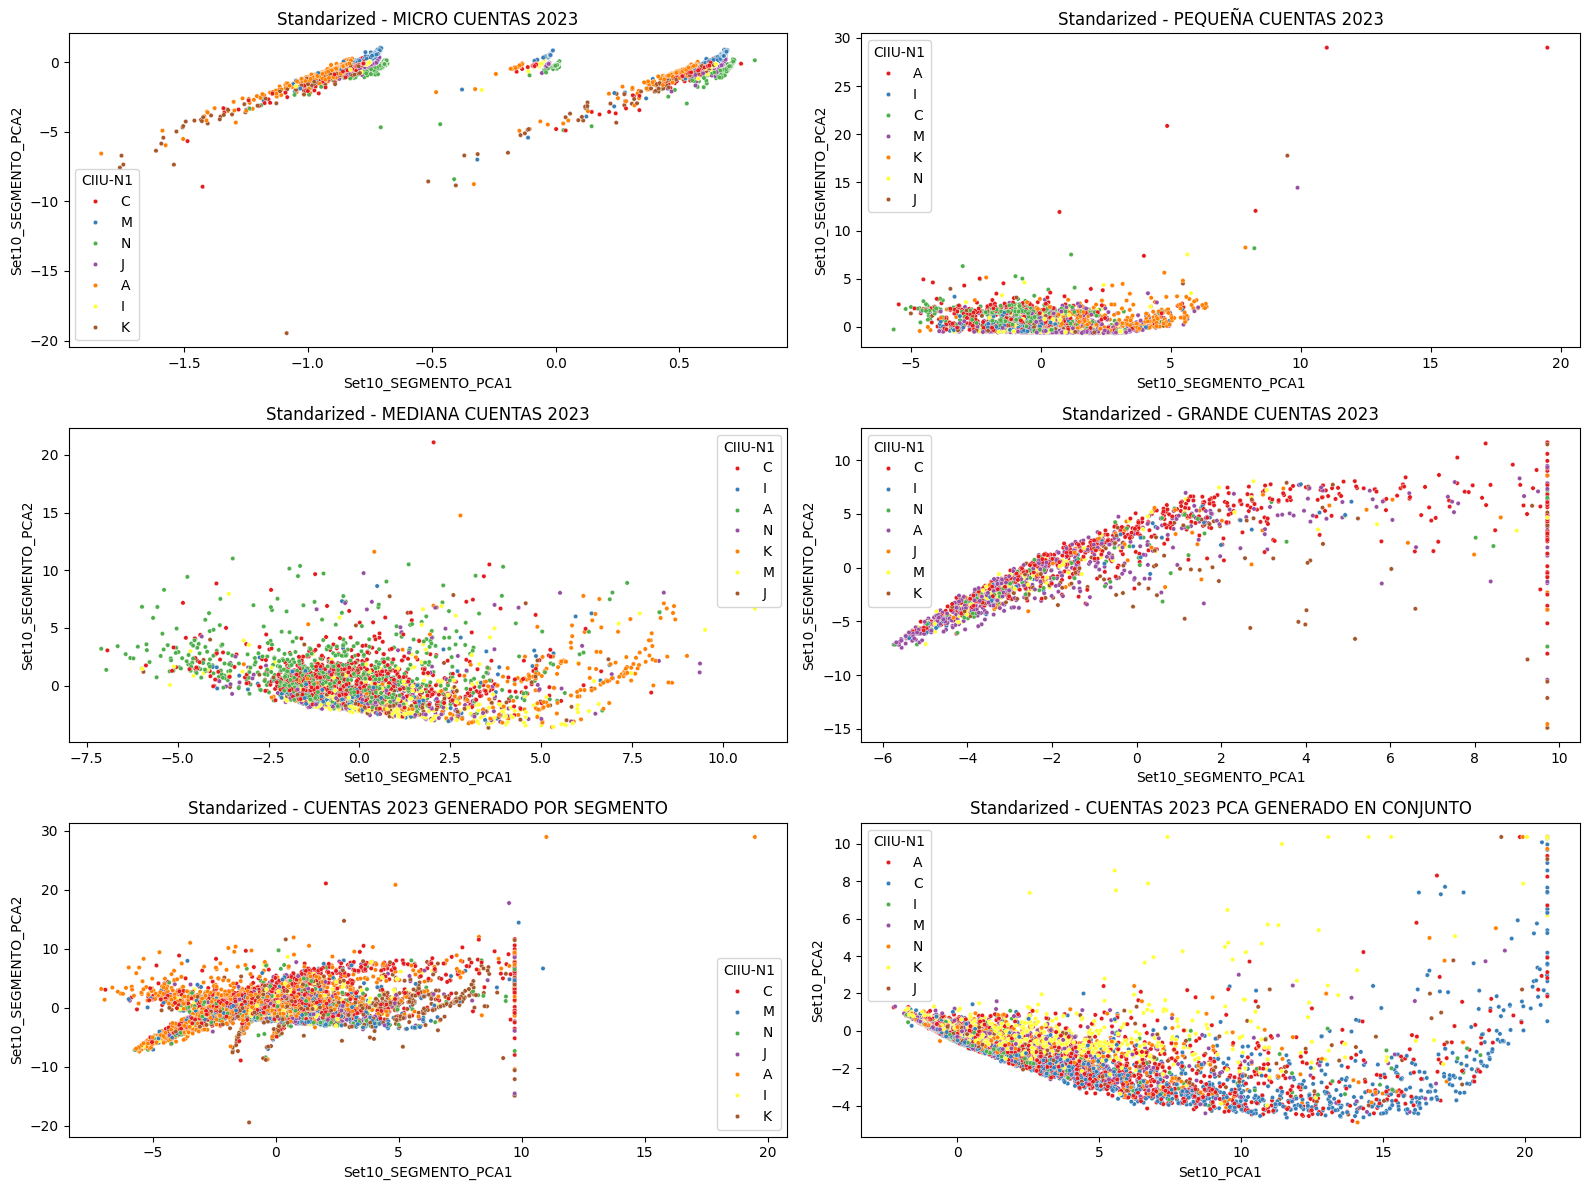

In [60]:

# Generar PCA con el dataset completo estandarizado
# pd_companias_standar_with_pca_set_10 = generar_2_pca_auto(pd_companias_standardized, var_st_set10_to_pca, 'Set10_PCA1', 'Set10_PCA2')


# Generar PCA con el dataset completo estandarizado por Regiones
pd_companias_standardized_micro = pd_companias_standardized[pd_companias_standardized['SEGMENTO']=='MICRO']
pd_companias_standardized_pequena = pd_companias_standardized[pd_companias_standardized['SEGMENTO']=='PEQUENA']
pd_companias_standardized_mediana = pd_companias_standardized[pd_companias_standardized['SEGMENTO']=='MEDIANA']
pd_companias_standardized_grande = pd_companias_standardized[pd_companias_standardized['SEGMENTO']=='GRANDE']

pd_companias_standar_with_pca_set_10_micro = generar_2_pca_auto(pd_companias_standardized_micro, var_st_set10_to_pca, 'Set10_SEGMENTO_PCA1', 'Set10_SEGMENTO_PCA2')
print(pd_companias_standar_with_pca_set_10_micro.shape)

pd_companias_standar_with_pca_set_10_pequena = generar_2_pca_auto(pd_companias_standardized_pequena, var_st_set10_to_pca, 'Set10_SEGMENTO_PCA1', 'Set10_SEGMENTO_PCA2')
print(pd_companias_standar_with_pca_set_10_pequena.shape)

pd_companias_standar_with_pca_set_10_mediana = generar_2_pca_auto(pd_companias_standardized_mediana, var_st_set10_to_pca, 'Set10_SEGMENTO_PCA1', 'Set10_SEGMENTO_PCA2')
print(pd_companias_standar_with_pca_set_10_mediana.shape)

pd_companias_standar_with_pca_set_10_grande = generar_2_pca_auto(pd_companias_standardized_grande, var_st_set10_to_pca, 'Set10_SEGMENTO_PCA1', 'Set10_SEGMENTO_PCA2')
print(pd_companias_standar_with_pca_set_10_grande.shape)


# Prueba Controlando outliers
pd_companias_standar_with_pca_set_10_micro = eliminar_outliers_tecnica_iqr(pd_companias_standar_with_pca_set_10_micro, ['Set10_SEGMENTO_PCA1', 'Set10_SEGMENTO_PCA2'],iqr_multiplier=50)
pd_companias_standar_with_pca_set_10_pequena = eliminar_outliers_tecnica_iqr(pd_companias_standar_with_pca_set_10_pequena, ['Set10_SEGMENTO_PCA1', 'Set10_SEGMENTO_PCA2'],iqr_multiplier=50)
pd_companias_standar_with_pca_set_10_mediana = eliminar_outliers_tecnica_iqr(pd_companias_standar_with_pca_set_10_mediana, ['Set10_SEGMENTO_PCA1', 'Set10_SEGMENTO_PCA2'],iqr_multiplier=50)
pd_companias_standar_with_pca_set_10_grande = eliminar_outliers_tecnica_iqr(pd_companias_standar_with_pca_set_10_grande, ['Set10_SEGMENTO_PCA1', 'Set10_SEGMENTO_PCA2'],iqr_multiplier=2.0) # Tiene valores extremos



# Unificar los 3 datasets
pd_companias_standar_with_pca_set_10_segmento = pd.concat(
    [
        pd_companias_standar_with_pca_set_10_micro,
        pd_companias_standar_with_pca_set_10_pequena,
        pd_companias_standar_with_pca_set_10_mediana,
        pd_companias_standar_with_pca_set_10_grande
    ],
    axis=0,  # Combinar filas
    ignore_index=True  # Reindexar el DataFrame Set10_PCA2
)

# Verificar el tamaño del DataFrame combinado
print(pd_companias_standar_with_pca_set_10_segmento.shape)


fig, axes = plt.subplots(3, 2, figsize=(16, 12))  # 3 fila y 2 columnas

# Primer gráfico
sns.scatterplot(x='Set10_SEGMENTO_PCA1', y='Set10_SEGMENTO_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_10_micro, palette='Set1', s=10, ax=axes[0, 0])
axes[0, 0].set_title('Standarized - MICRO CUENTAS 2023')
axes[0, 0].legend(title="CIIU-N1")
# axes[0, 0].set_ylim(-0.05, 0.05)
# axes[0, 0].set_xlim(-2, 10)

sns.scatterplot(x='Set10_SEGMENTO_PCA1', y='Set10_SEGMENTO_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_10_pequena, palette='Set1', s=10, ax=axes[0, 1])
axes[0, 1].set_title('Standarized - PEQUEÑA CUENTAS 2023')
axes[0, 1].legend(title="CIIU-N1")
# axes[0, 1].set_ylim(-0.025, 0.025)
# axes[0, 1].set_xlim(-0.025, 0.025)

sns.scatterplot(x='Set10_SEGMENTO_PCA1', y='Set10_SEGMENTO_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_10_mediana, palette='Set1', s=10, ax=axes[1, 0])
axes[1, 0].set_title('Standarized - MEDIANA CUENTAS 2023')
axes[1, 0].legend(title="CIIU-N1")
# axes[1, 0].set_ylim(-5, 5)
# axes[1, 0].set_xlim(-10, 50)

sns.scatterplot(x='Set10_SEGMENTO_PCA1', y='Set10_SEGMENTO_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_10_grande, palette='Set1', s=10, ax=axes[1, 1])
axes[1, 1].set_title('Standarized - GRANDE CUENTAS 2023')
axes[1, 1].legend(title="CIIU-N1")
# axes[1, 1].set_ylim(-5, 5)
# axes[1, 1].set_xlim(-2, 10)

sns.scatterplot(x='Set10_SEGMENTO_PCA1', y='Set10_SEGMENTO_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_10_segmento, palette='Set1', s=10, ax=axes[2, 0])
axes[2, 0].set_title('Standarized - CUENTAS 2023 GENERADO POR SEGMENTO')
axes[2, 0].legend(title="CIIU-N1")
# axes[1, 0].set_ylim(-5, 5)
# axes[1, 0].set_xlim(-10, 50)

sns.scatterplot(x='Set10_PCA1', y='Set10_PCA2', hue='CIIU_NIVEL_1', data=pd_companias_standar_with_pca_set_10, palette='Set1', s=10, ax=axes[2, 1])
axes[2, 1].set_title('Standarized - CUENTAS 2023 PCA GENERADO EN CONJUNTO')
axes[2, 1].legend(title="CIIU-N1")
# axes[1, 1].set_ylim(-5, 5)
# axes[1, 1].set_xlim(-2, 10)

plt.tight_layout()
plt.show()



## Dataset Seleccionados

+ pd_companias_standar_with_pca_set_10_region
    + Cuentas 2023 y Variables Categóricas
    + Este dataset se añade al conjunto principal en la versión generada separada por región

+ pd_companias_standar_with_pca_set_4_region (Potencial análisis)
    + Indicadores Financieros y Variables Categóricas
    + De momento no se explora

## Generar Dataset con PCA

In [61]:
pd_companias.isna().sum()
pd_companias.shape

(37884, 83)

In [62]:
pd_merged = pd_companias

pd_merged = pd.merge(pd_merged, pd_companias_standar_with_pca_set_10[['RUC','Set10_PCA1', 'Set10_PCA2']], left_on='RUC', right_on='RUC', how='inner')
print(pd_merged.shape)
# En el Sprint 2 se descarta porque no genera buenos resultados respecto al cálculo del LQs
pd_merged = pd.merge(pd_merged, pd_companias_standar_with_pca_set_10_region[['RUC','Set10_REGION_PCA1', 'Set10_REGION_PCA2']], left_on='RUC', right_on='RUC', how='inner')
print(pd_merged.shape)

(37884, 85)
(37884, 87)


In [63]:
pd_merged.sample(4)

EXPEDIENTE            RUC SITUACION_LEGAL FECHA_CONSTITUCION     TIPO  \
28241      706421  1391834578001          ACTIVA         04/02/2016  ANÓNIMA   
7687       131142  0992569840001          ACTIVA         04/06/2008  ANÓNIMA   
16929      311863  1792912512001          ACTIVA         11/10/2018  ANÓNIMA   
11772      166558  0992794917001          ACTIVA         04/12/2012  ANÓNIMA   

          PAIS  REGION  PROVINCIA     CANTON     CIUDAD  ... CIIU_NIVEL_1_N  \
28241  ECUADOR   COSTA     MANABI      MANTA      MANTA  ...            0.0   
7687   ECUADOR   COSTA     GUAYAS  GUAYAQUIL  GUAYAQUIL  ...            0.0   
16929  ECUADOR  SIERRA  PICHINCHA      QUITO      QUITO  ...            0.0   
11772  ECUADOR   COSTA     GUAYAS  GUAYAQUIL  GUAYAQUIL  ...            0.0   

      REGION_COSTA REGION_GALÁPAGOS REGION_ORIENTE REGION_SIERRA  \
28241          1.0              0.0            0.0           0.0   
7687           1.0              0.0            0.0           0.0   
16929          0.0              0.0            0.0           1.0   
11772          1.0              0.0            0.0           0.0   

      SEGMENTO_ENCODED Set10_PCA1 Set10_PCA2  Set10_REGION_PCA1  \
28241                2  -0.535714   0.122698          -0.688874   
7687                 1  -1.030433   0.449771          -1.135171   
16929                1  -1.100308   0.339932          -1.006579   
11772                2  -0.437933   0.085120          -0.581519   

       Set10_REGION_PCA2  
28241           0.204269  
7687            0.445971  
16929           0.269110  
11772           0.143129  

[4 rows x 87 columns]

In [64]:
pd_merged.to_csv('Datasets Procesados\\directorio_empresas_final_PCA.csv', index=False)